# Исследование объявлений о продаже квартир

Исследование проводится в интересах сервиса Яндекс Недвижимость. На основании архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет следует научиться определять рыночную стоимость объектов недвижимости.

***Ограничения исследования:***

1. По каждой квартире на продажу доступны два вида данных  
Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных

 
***Цель исследования:***

1. Определить рыночную стоимость объектов недвижимости
2. Установить, какие факторы влияют на ценообразование стоимости квартир

***Ход исследования***

Данные о недвижимости я получу из файла "...datasets/real_estate_data.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа

Таким образом, моё исследование пройдёт в пять этапов:

* Обзор данных
* Предобработка данных
* Расчеты и добавление результатов в таблицу
* Проведение анализа исследовательского анализа для Санкт-Петербурга и Ленинградской области
* Написание общего вывода

***Описание данных***
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах (м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — общая площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении
 
 _______________________

Для начала импортируем библиотеки и зафиксируем глобальные константы:

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt 

In [2]:
warnings.filterwarnings('ignore') # отключаем предупреждения

In [3]:
%%javascript
// Костыль для того, чтоб не сворачивалось окно при длинном выводе
IPython.OutputArea.auto_scroll_threshold = 100; 

<IPython.core.display.Javascript object>

## Шаг 1 Откройте файл с данными и изучите общую информацию

In [4]:
try:
     # загружаем с локального хранилища
    d_data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
    
    print('*' * 50, 'Данные о недвижимости', sep='\n')
    display(d_data.head(5))
    print()
    d_data.info()

except:
     # загружаем из хранилища Яндекс
    d_data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
    print('Файл загружен из хранилища Яндекс')
    print('*' * 50, 'Данные о недвижимости', sep='\n')
    display(d_data.head(5))
    print()
    d_data.info()

**************************************************
Данные о недвижимости


total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

Построим гистограммы по количественным значениям:

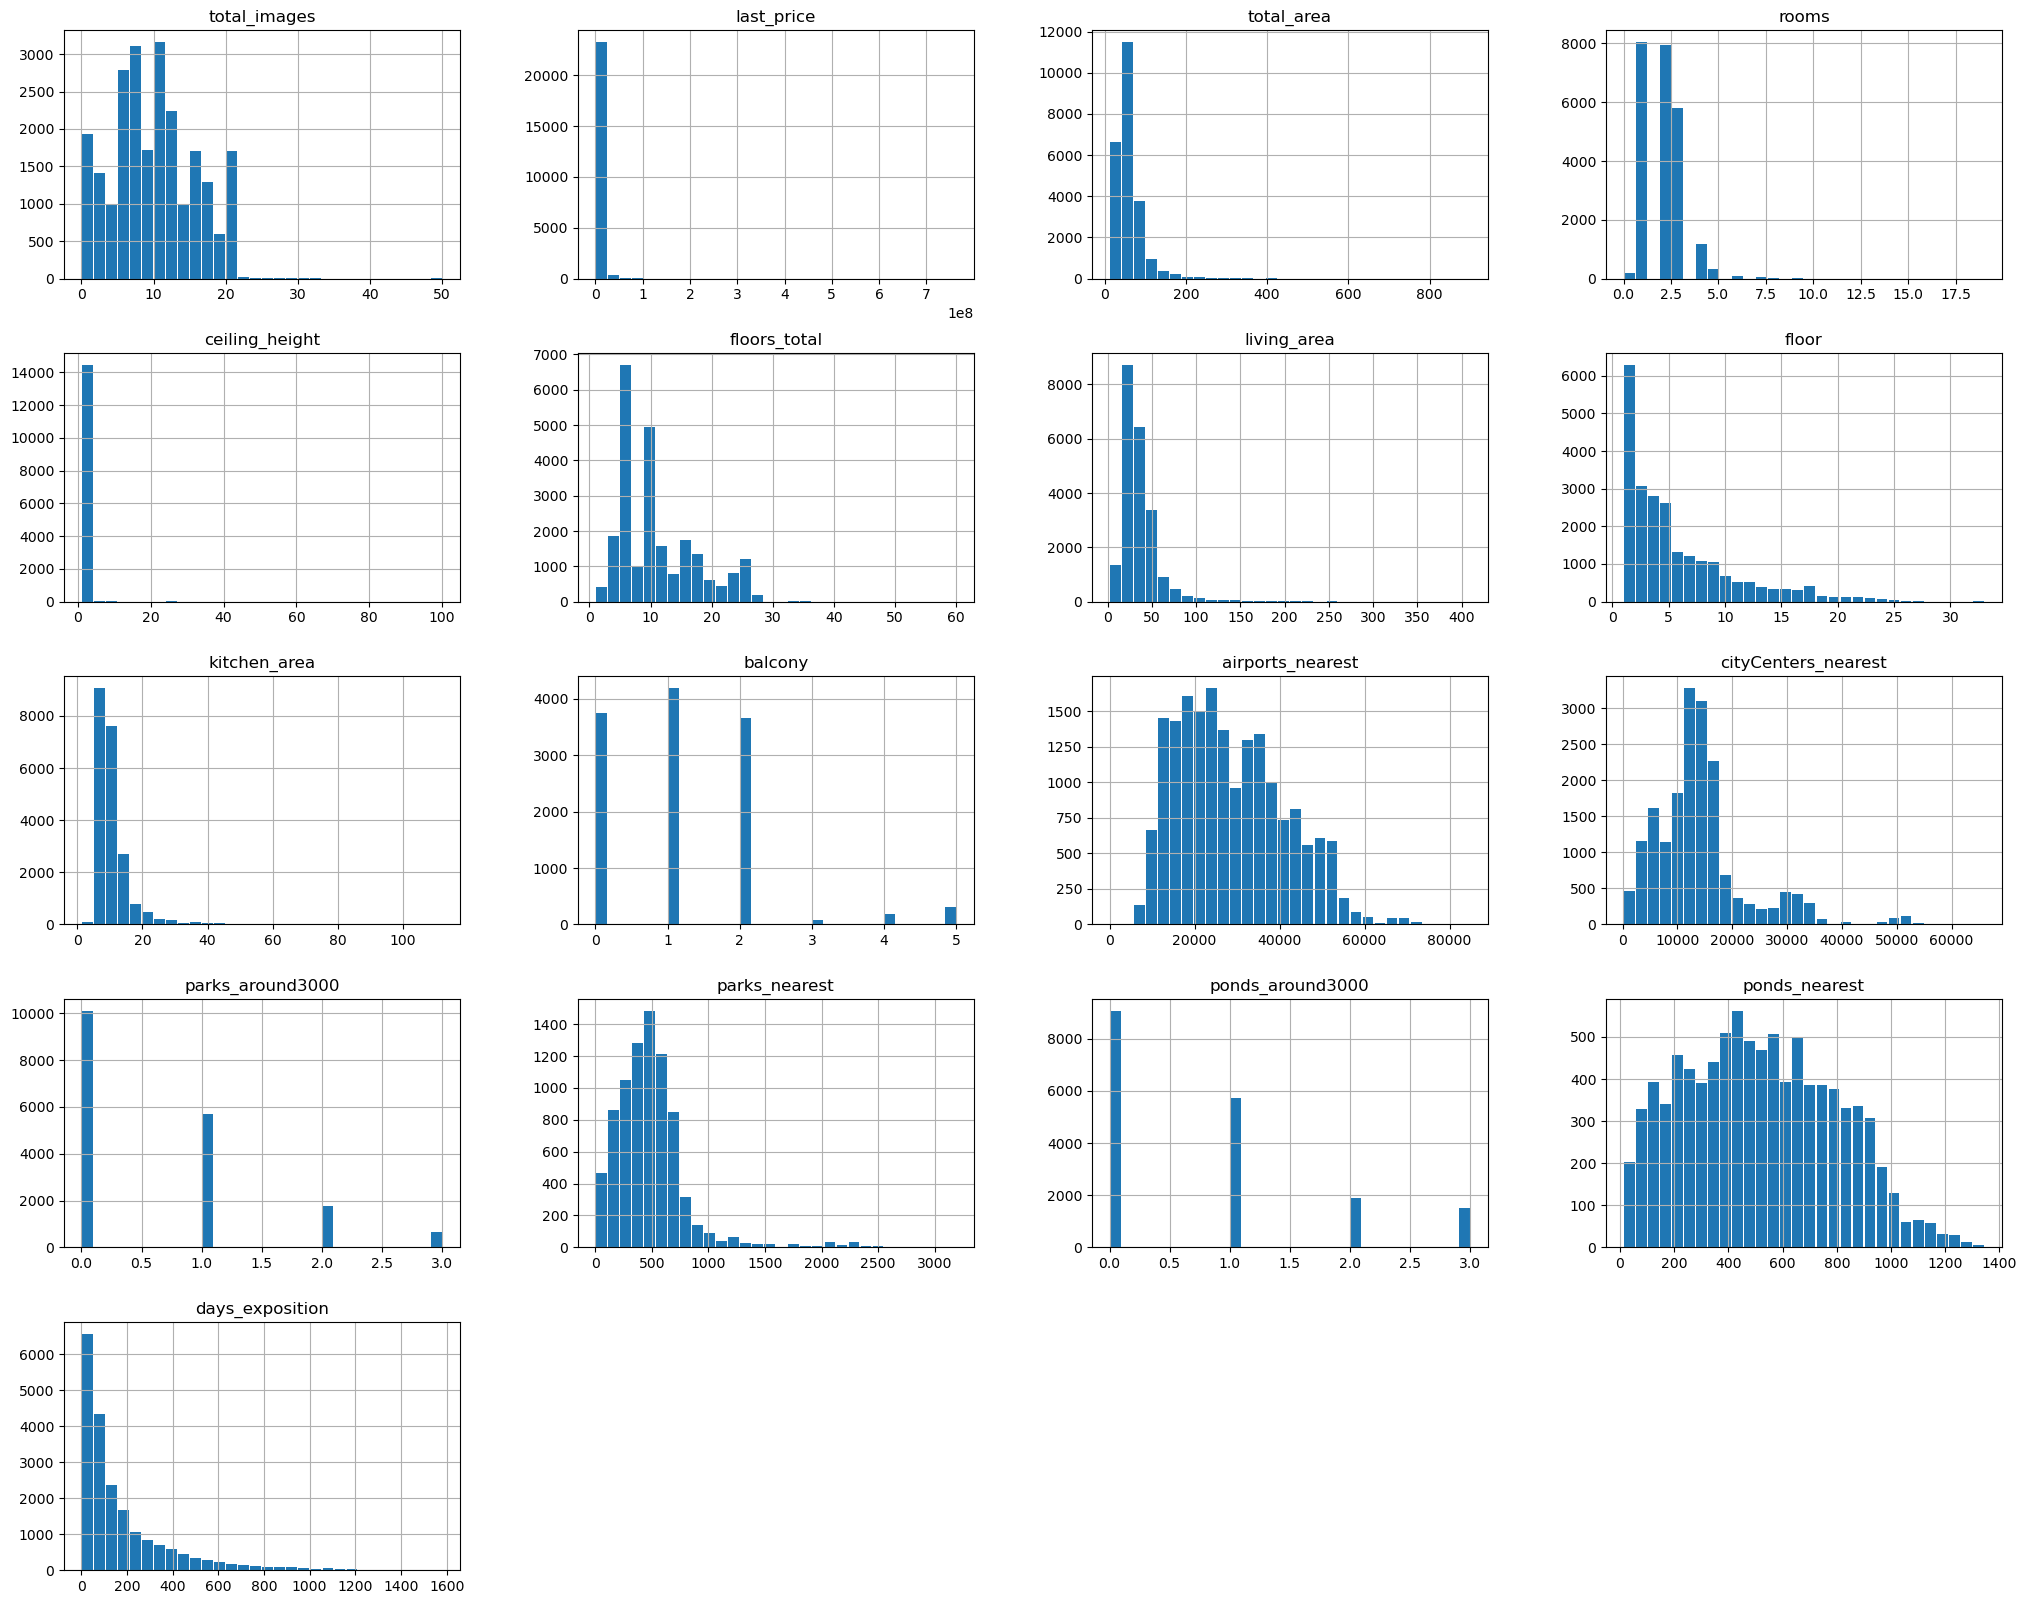

In [5]:
d_data.hist(figsize=(25, 20), rwidth= .9, bins=30);

После применения d_data.info() и d_data.hist() предварительно понимаем, что придется поработать с данными:
* Недостающие данные
    + ceiling_height
    + floors_total
    + living_area
    + is_apartment
    + kitchen_area
    + balcony
    + locality_name
    + airports_nearest
    + cityCenters_nearest
    + parks_around3000
    + parks_nearest
    + ponds_around3000
    + ponds_nearest
    + days_exposition
* Некорректное именование столбцов
    + Не обнаружено
* Некорректный тип данных
    + first_day_exposition -> datetime
    + floors_total -> int
    + is_apartment -> bool
    + balcony -> int
    + parks_around3000 -> int
    + ponds_around3000 -> int
    + days_exposition -> int
* Непонятные выбросы в гистограммах:
    + ceiling_height

## Шаг 2 Предобработка данных

#### 2.1 Заполение недостающих данных
##### 2.1.1 balcony

Выглядит так, что легко заполнить одинаковыми значениями, предположив, что там, где балконы не указаны, их нет.\
Проверим, какие значения есть в переменной.

In [6]:
d_data.groupby('balcony')['balcony'].count()

balcony
0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

Получаем, что если мы заполним пустые значения нулями, то получится 11 519 квартир без информации плюс 3 758 квартир с отсутствием балконов -- 15 277 квартир, что больше половины от общего объема. Каджется нереалистичным и переворачивает с ног на голову распределение по существующим данным.


Поэтому продолжим иссследование -- сравним распеределение по этажам, на которых размещена квартира:

* Квартиры без балконов
* Квартиры с незаполненными данными
* Все квартиры с заполненными данными

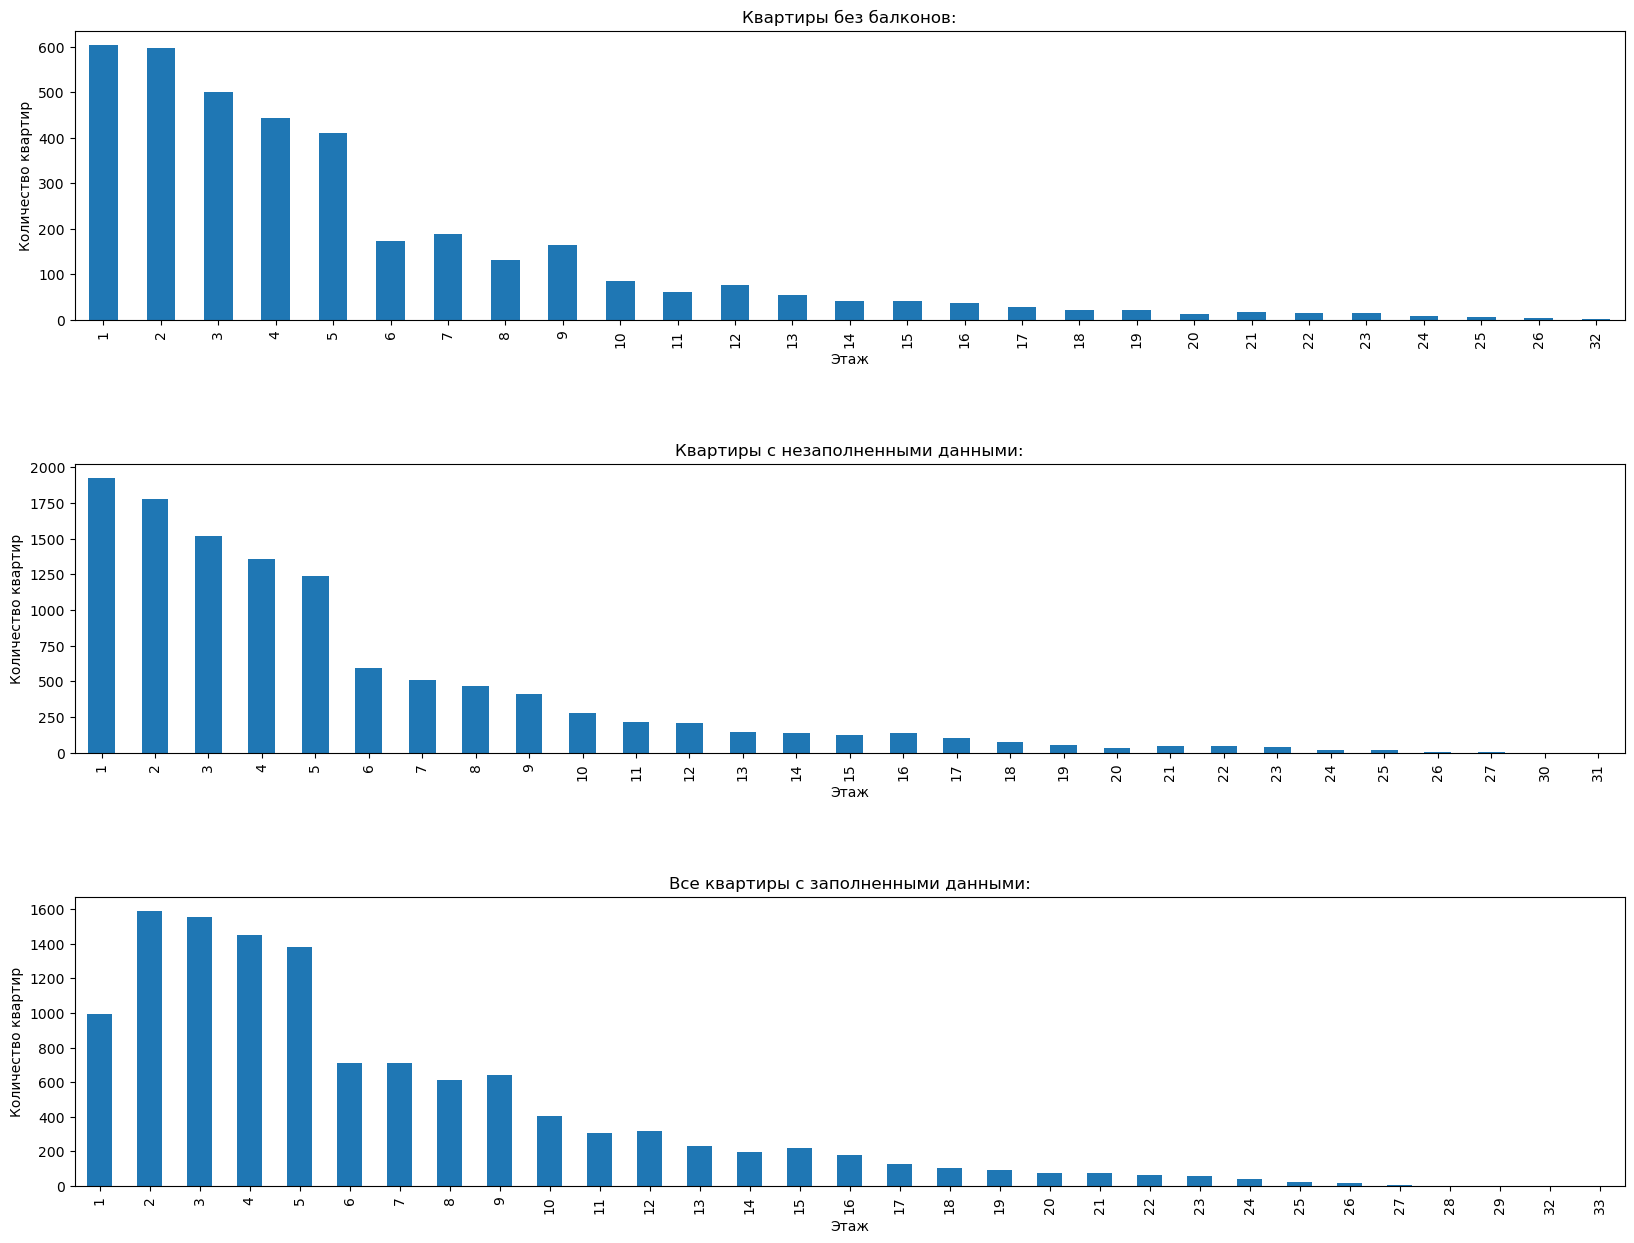

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

d_data[d_data['balcony'] == 0].groupby('floor')['floor'].count().plot(kind='bar', grid=False, ax=axes[0])
axes[0].set_xlabel("Этаж")
axes[0].set_ylabel("Количество квартир")
axes[0].set_title("Квартиры без балконов:")

d_data[d_data.balcony.isna()].groupby('floor')['floor'].count().plot(kind='bar', grid=False, ax=axes[1])
axes[1].set_xlabel("Этаж")
axes[1].set_ylabel("Количество квартир")
axes[1].set_title("Квартиры с незаполненными данными:")

d_data[~d_data.balcony.isna()].groupby('floor')['floor'].count().plot(kind='bar', grid=False, ax=axes[2])
axes[2].set_xlabel("Этаж")
axes[2].set_ylabel("Количество квартир")
axes[2].set_title("Все квартиры с заполненными данными:");

Распределение этажности по категориям "Без данных" и "Без балконов" схожи, но в категории "Все квартиры с заполненными данными" квартир на первом этаже оказалось примерно в полтора раза меньше квартр на первом и втором этаже. Это идет в копилку гипотезе "Незаполненные данные следует заполнить нулями".
Однако напомню, что доля квартир без балконов при таком подходе будет ~64% от общего числа квартир.

Проверим, как там на Циане сейчас.
Ограничиваем по Санкт-Петербургу, получаем:
Всего 65 964 объявлений, квартир с балконами 28 562, квартир без балконов, соответственно, 37 402, что состовляет ~57% от общего числа квартир.

Судя по всему, на рынке недвижимости Санкт-Петербурга действительно больше половины квартир без балконов, поэтому пропуски заполняем нулями.

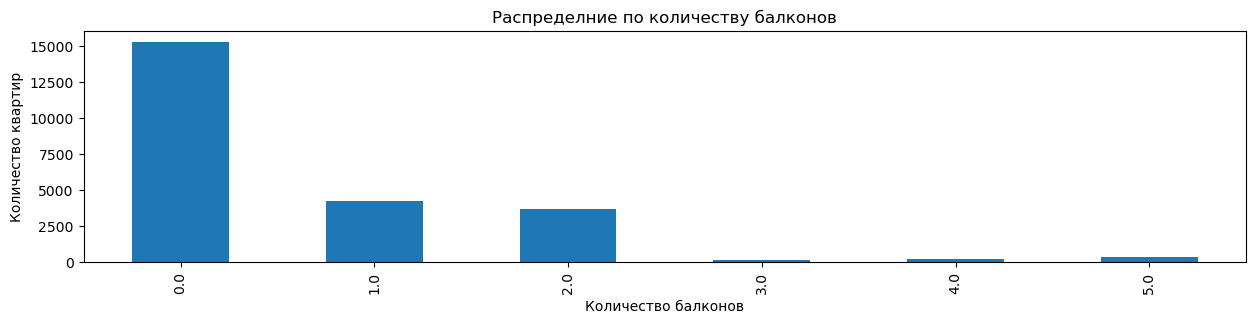

In [8]:
d_data['balcony'] = d_data['balcony'].fillna(0)

fig, axes = plt.subplots(figsize=(15, 3))
plt.subplots_adjust(hspace=0.5)

d_data.groupby('balcony')['balcony'].count().plot(kind='bar', grid=False, ax=axes)
axes.set_xlabel("Количество балконов")
axes.set_ylabel("Количество квартир")
axes.set_title("Распределние по количеству балконов");

###### Вероятные причины
Здесь и далее -- я подозреваю, что данные у нас с Яндекс Недвижимости, буду поглядывать туда в первую очередь =))

Поле необязательное в объявлении, там кнопочка просто с возможностью добавить два балкона. Тут интереснее даже, откуда нули появились. Суди по всему, источник даннных не один. Где-то проставляются нули, где-то ничего не вносится.

##### 2.1.2 is_apartment

Заполнено по 2 775 квартирам. Посмотрим, что внутри:

In [9]:
d_data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

0,2% квартир отмечены как апартаменты, по 89% квартир данные отсутствуют.
Синтетические вывести значения из контекста невозможно, так как это независимый от остальных атрибут.
Если заполнить пустые строки значением False, то получим совсем уж странное распределение -- 50 против 23 199, что противоречит объективной реальности.
К сожалению, столбец "is_apartment" бесполезен. Дропаем его без сожаления.

In [10]:
d_data = d_data.drop(columns = ['is_apartment'],axis = 1)

###### Вероятные причины

При размещении объявления нет значения по умолчанию, также нет пояснения к разделу "Статус", где это значени выбирается. Подозреваю, что далеко не все продавцы своей недвижимости в курсе, что занчит разделение на Аппартаменты/Жилой фонд, а понятие "Аппартаменты" все еще воспринимается как "номер в гостинице на длительные срок аренды" (апарт-отель).

##### 2.1.3 locality_name

49 пропущенных значений всего, из них 41 в окрестностях Санкт-Петербурга. Данные почти наверняка тянутся из адреса так же как и расстояния до аэропорта и центра, которые заполнены почти везде (41 квартира).

От центра до КАД-а минимум 11 километров, поэтому адреса внутри окружности с радиусом 11км точно в Санкт-Петербурге, где всё остальное неизвестно -- адресов нет.

Заполняем:

In [11]:
d_data.loc[(d_data['locality_name'].isna() & (d_data['cityCenters_nearest'] < 11000)), 'locality_name'] = 'Санкт-Петербург'

d_data.loc[(d_data['locality_name'].isna() & ((d_data['cityCenters_nearest'] >= 11000) | \
                                              (d_data['cityCenters_nearest'].isna()))), 'locality_name'] = 'неизвестно'

###### Вероятные причины

Так как у нас есть данные по расстояниям, тут только два варианта:
 - технический сбой
 - это новостройки, поэтому можно измерить расстояние от объекта до аэропорта, например, но признак принадлежности их к населенному пункту еще в базу не приехал

##### 2.1.4 airports_nearest и cityCenters_nearest

Для начала поймем, о чем речь.
В датасете данные по Санкт-Петербургу и Ленинградской области, а городов и аэропортов там больше одного

1. airports_nearest

Обратимся к Википедии

 - ru.wikipedia.org/wiki/Категория:Аэропорты_Санкт-Петербурга
 - ru.wikipedia.org/wiki/Категория:Аэродромы_Ленинградской_области 
 
Все площадки кроме Пулково либо военные, либо заброшенные, либо учебные, либо спортивные.

То есть, действующий пассажирский аэропорт один -- Пулково и расстояние измеряется до него.
Посмотрим, по каким начеленным пунктам пропуски:

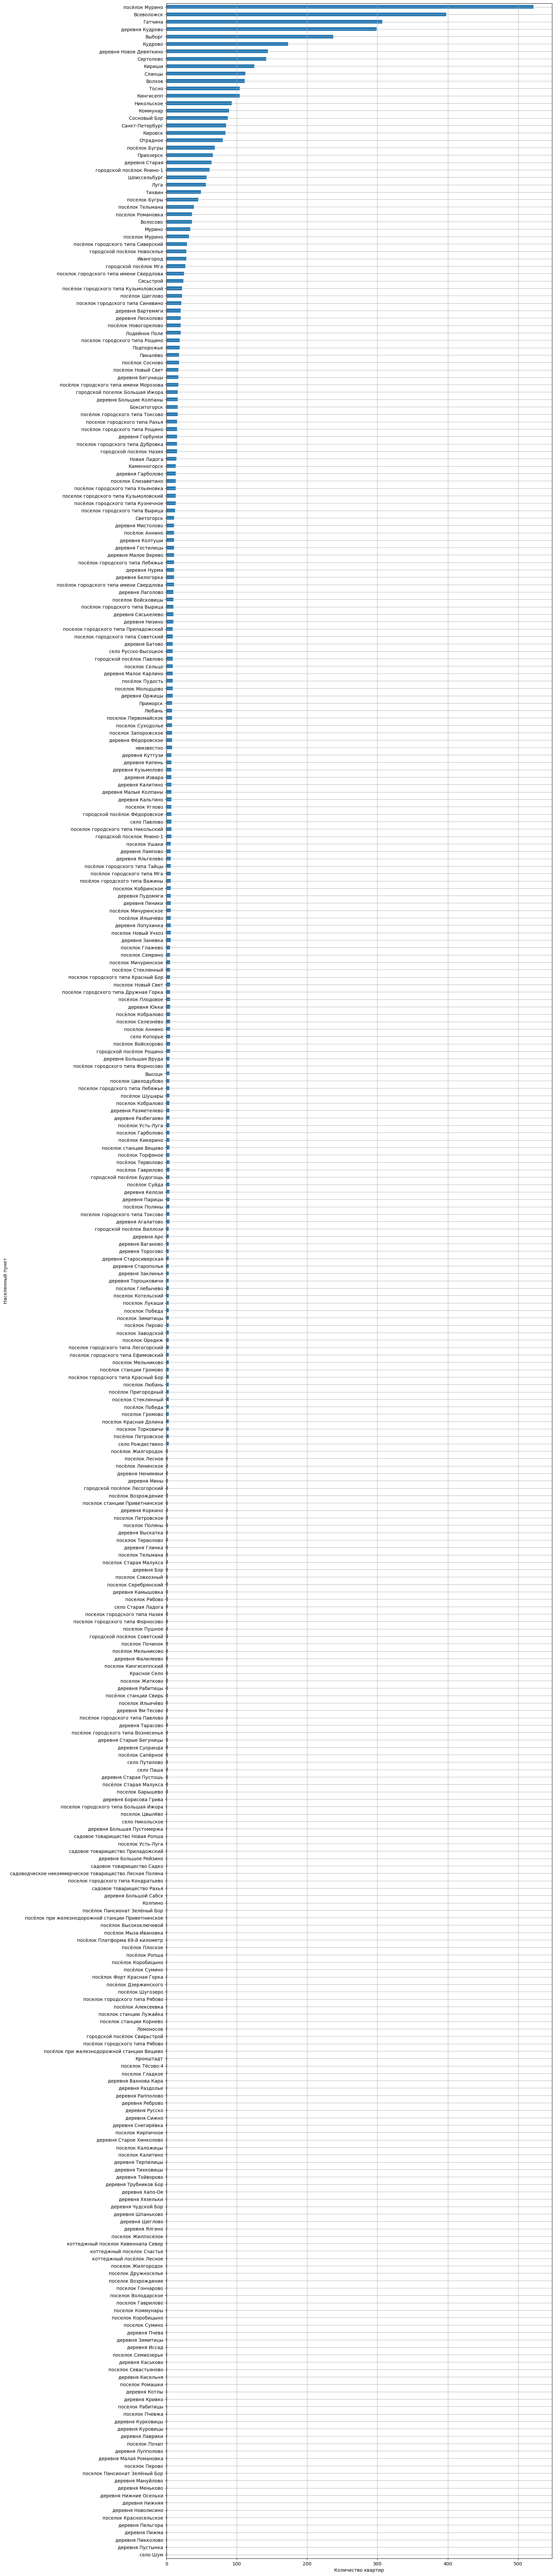

In [12]:
d_data[d_data.airports_nearest.isna()].groupby('locality_name')['locality_name'].count().sort_values().\
plot(kind='barh', grid=True, figsize=(15, 100), xlabel='Количество квартир', ylabel='Населенный пункт');

В глаза бросаются сразу странности с 'locality_name'
- "поселок"-"посёлок"
- "гододской поселок"-"поселок городского типа"
- Кудрово-деревня Кудрово (в Ленинградской области есть только город Кудрово, деревни Кудрово есть в Новгородской и Псковской (зато целых три) областях)

В рамках исследования правка данных у нас идет следующим этапом, но предлагаю выровнять данные по населенным пунктам в ходе заполнения расстояний.

В первую очередь посмотрим на отсортированные уникальные значения:

In [13]:
d_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Наблюдаем следующие классификаторы:

- городской поселок
- городской посёлок
- деревня
- коттеджный поселок
- коттеджный посёлок
- поселок
- посёлок
- поселок городского типа
- посёлок городского типа
- посёлок при железнодорожной станции
- поселок станции
- посёлок станции
- садоводческое некоммерческое товарищество
- садовое товарищество
- село

Отдельно можно выделить 38 населенных пунктов без классификатора.

Это либо города, либо муниципальные образования внутри Санкт-Петербурга (города и посёлки)

Список таких муниципальных образований взял отсюда:

ru.wikipedia.org/wiki/Внутригородская_территория_города_федерального_значения

Поэтому предлагается:
* Очистить locality_name от классификаторов
* Добавить столбец с типом населенного пункта, причем заполнить его следующим образом:
    + из таблицы с классификацией внутригородской территории ввести:
        - район Санкт-Петербурга (посёлок)
        - район Санкт-Петербурга (город)
    + всё остальное распределить по:
        - город (без классификатора, с провекой по списку городов Ленинградской области)
        - поселок городского типа (городской поселок, городской посёлок, поселок городского типа, посёлок городского типа)
        - сельский населенный пункт (всё остальное)

Подготовим соответствующие функции для переименования:

In [14]:
def local_classification (row):
# Проставляем данные для поселков внутри Санкт-Петербурга по названиям из Вики
    if 'Александровская' in row or 'Белоостров' in row or 'Левашово' in row \
    or 'Лисий Нос' in row or 'Металлострой' in row or 'Молодёжное' in row or 'Парголово' in row \
    or 'Песочный' in row or 'Петро-Славянка' in row or 'Понтонный' in row or 'Репино' in \
    row or 'Сапёрный' in row or 'Стрельна' in row or 'Усть-Ижора' in row or 'Шушары' in row:
        
        return 'район Санкт-Петербурга (посёлок)'
    
# Проставляем данные для городов внутри Санкт-Петербурга по названиям из Вики    
    elif 'Зеленогорск' in row or 'Колпино' in row or 'Красное Село' in row or 'Кронштадт' in row \
    or 'Ломоносов' in row or 'Павловск' in row or 'Петергоф' in row or 'Пушкин' in row or 'Сестрорецк' in row:
        
        return 'район Санкт-Петербурга (город)'
    
# Проставляем данные для городов внутри Ленинградской области по названиям из Вики    
    elif 'Бокситогорск' in row or 'Волосово' in row or 'Волхов' in row \
    or 'Всеволожск' in row or 'Выборг' in row or 'Высоцк' in row \
    or 'Гатчина' in row or 'Ивангород' in row or 'Каменногорск' in row \
    or 'Кингисепп' in row or 'Кириши' in row or 'Кировск' in row or 'Коммунар' in row \
    or 'Кудрово' in row or 'Лодейное Поле' in row or 'Луга' in row or 'Любань' in row \
    or 'Мурино' in row or 'Никольское' in row or 'Новая Ладога' in row or 'Отрадное' in row \
    or 'Пикалёво' in row or 'Подпорожье' in row or 'Приморск' in row or 'Приозерск' in row \
    or 'Санкт-Петербург' in row or 'Светогорск' in row or 'Сертолово' in row \
    or 'Сланцы' in row or 'Сосновый Бор' in row or 'Сясьстрой' in row or 'Тихвин' in row \
    or 'Тосно' in row or 'Шлиссельбург' in row:
        
        return 'город'
    
# Проставляем данные для ПГТ внутри Ленинградской области по префиксам из locality_name
# Важно поставить этот блок раньше сельских населенных пунктов, та как там встречаются значения "поселок" и "посёлок", 
# которые сами являются префиксами внутри префиксов
# Ну и не забыть про пробелы после названий -- у нас "село" есть внутри "поселок", например
    elif 'городской поселок ' in row or 'городской посёлок' in row \
    or 'поселок городского типа' in row or 'посёлок городского типа' in row:
        
        return 'поселок городского типа'
    
# Проставляем данные для сёл внутри Ленинградской области по префиксам из locality_name    
    elif 'деревня ' in row or 'коттеджный поселок ' in row \
    or 'коттеджный посёлок ' in row or 'поселок ' in row \
    or 'посёлок ' in row or 'посёлок при железнодорожной станции ' in row \
    or 'поселок станции ' in row or 'посёлок станции ' in row \
    or 'садоводческое некоммерческое товарищество ' in row \
    or 'садовое товарищество ' in row or 'село ' in row:
        
        return 'сельский населенный пункт'
    
    else:
        
        return 'неизвестно'
    
def erase_class(row):
    clas_loc = ['городской поселок ', 'городской посёлок ', 'поселок городского типа ', \
                 'посёлок городского типа ', 'деревня ', 'коттеджный поселок ', 'коттеджный посёлок ', \
                 'посёлок при железнодорожной станции ', 'поселок станции ', \
                 'посёлок станции ', 'садоводческое некоммерческое товарищество ', \
                 'садовое товарищество ', 'поселок ', 'посёлок ', 'село '] 
    for clas in clas_loc:
        if clas in row:
            return row[len(clas):] # Обрезаем префиксы по их длине
    return row
    
d_data['class_loc'] = d_data['locality_name'].apply(local_classification) # Заполняем классификатор по населенным пунктам
d_data['locality_name'] = d_data['locality_name'].apply(erase_class) # Отрезаем префиксы

Повторим испытание:

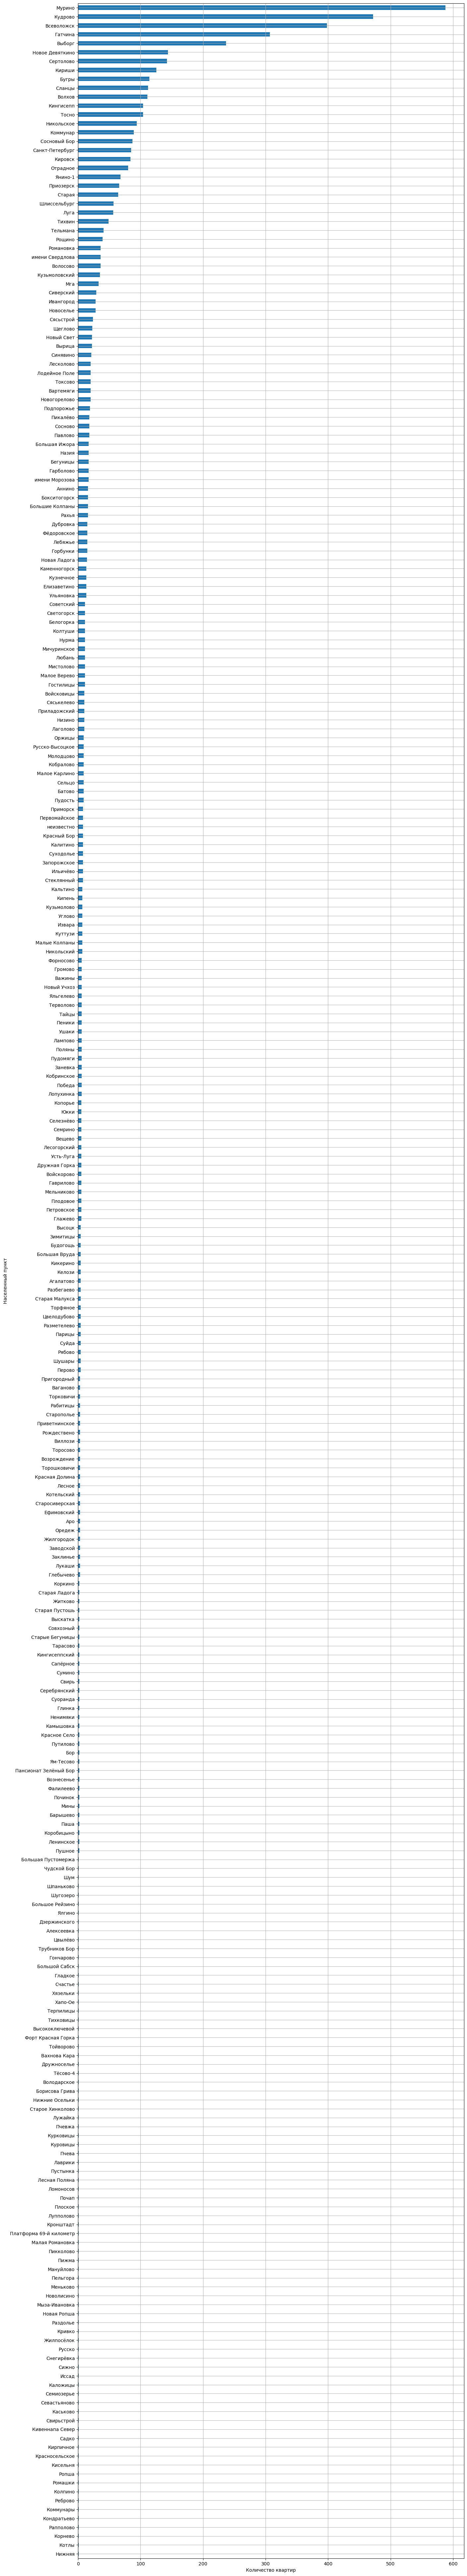

In [15]:
d_data[d_data.airports_nearest.isna()].groupby('locality_name')['locality_name'].count().sort_values().\
plot(kind='barh', grid=True, figsize=(15, 100), xlabel='Количество квартир', ylabel='Населенный пункт');

Все было не зря -- "Кудрово" и "деревня Кудрово" объединились и вышли на второе место, например.

Заполним данные средними значениями в рамках населенного пункта, то, что недозаполнилось, заполним значениями из справочника:

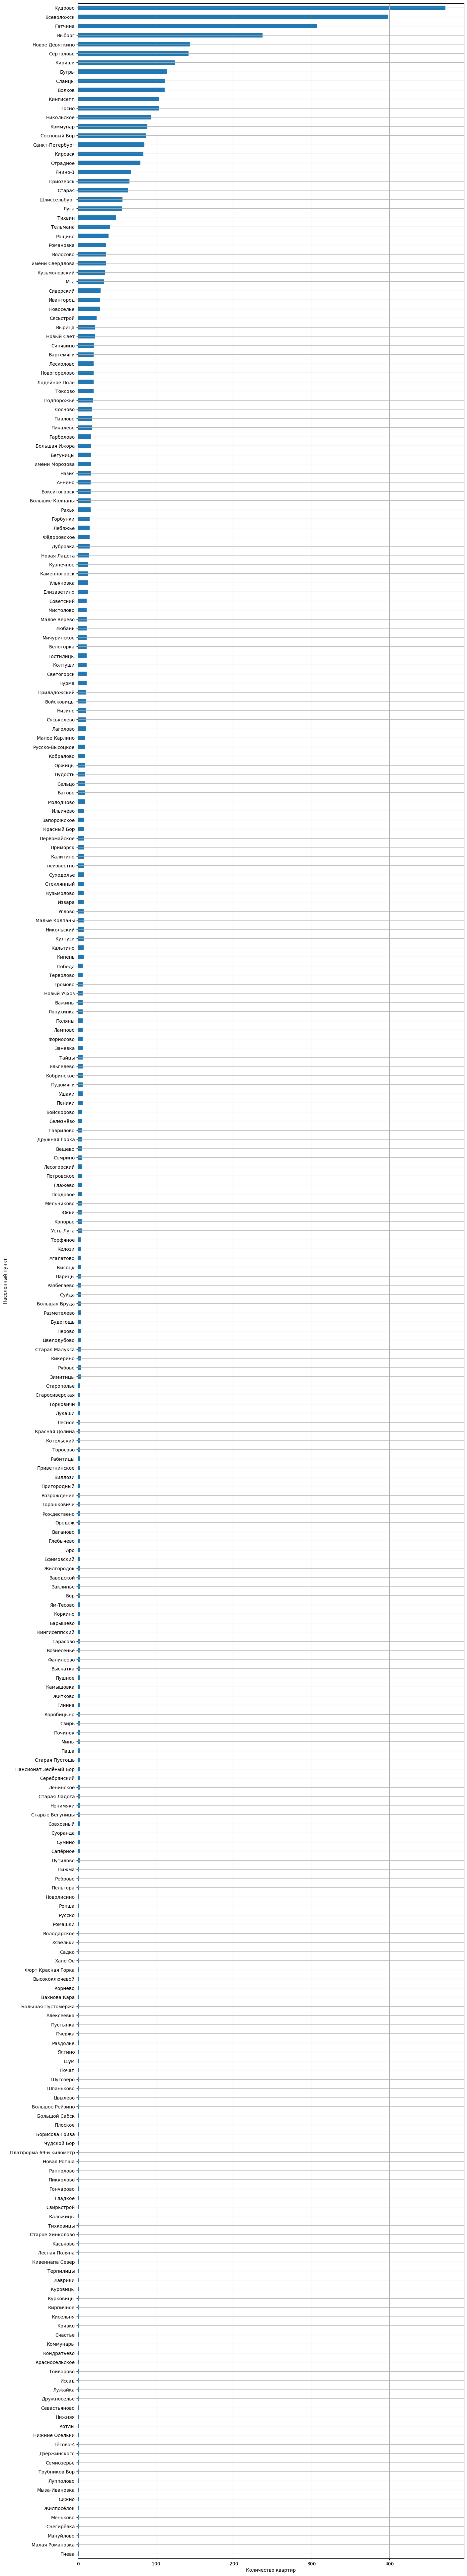

In [16]:
for locality in d_data.loc[(d_data['locality_name'] != 'Санкт-Петербург') & \
                           (d_data['locality_name'] != 'неизвестно'), 'locality_name'].unique(): 
    # не рассматриваем "Санкт-Петербург" и "неизвестно"
    # заполняем медианами по населенному пункту
    d_data.loc[(d_data['locality_name'] == locality) & (d_data['airports_nearest'].isna()), 'airports_nearest'] = \
    d_data.loc[(d_data['locality_name'] == locality), 'airports_nearest'].median()

    
d_data[d_data.airports_nearest.isna()].groupby('locality_name')['locality_name']\
.count().sort_values().plot(kind='barh', grid=True, figsize=(15, 100),\
                            xlabel='Количество квартир', ylabel='Населенный пункт');

Заполняем значениями из справочника. Сразу скажу, что я проигнорировал населенные пункты с количеством объявлений меньше двадцати.

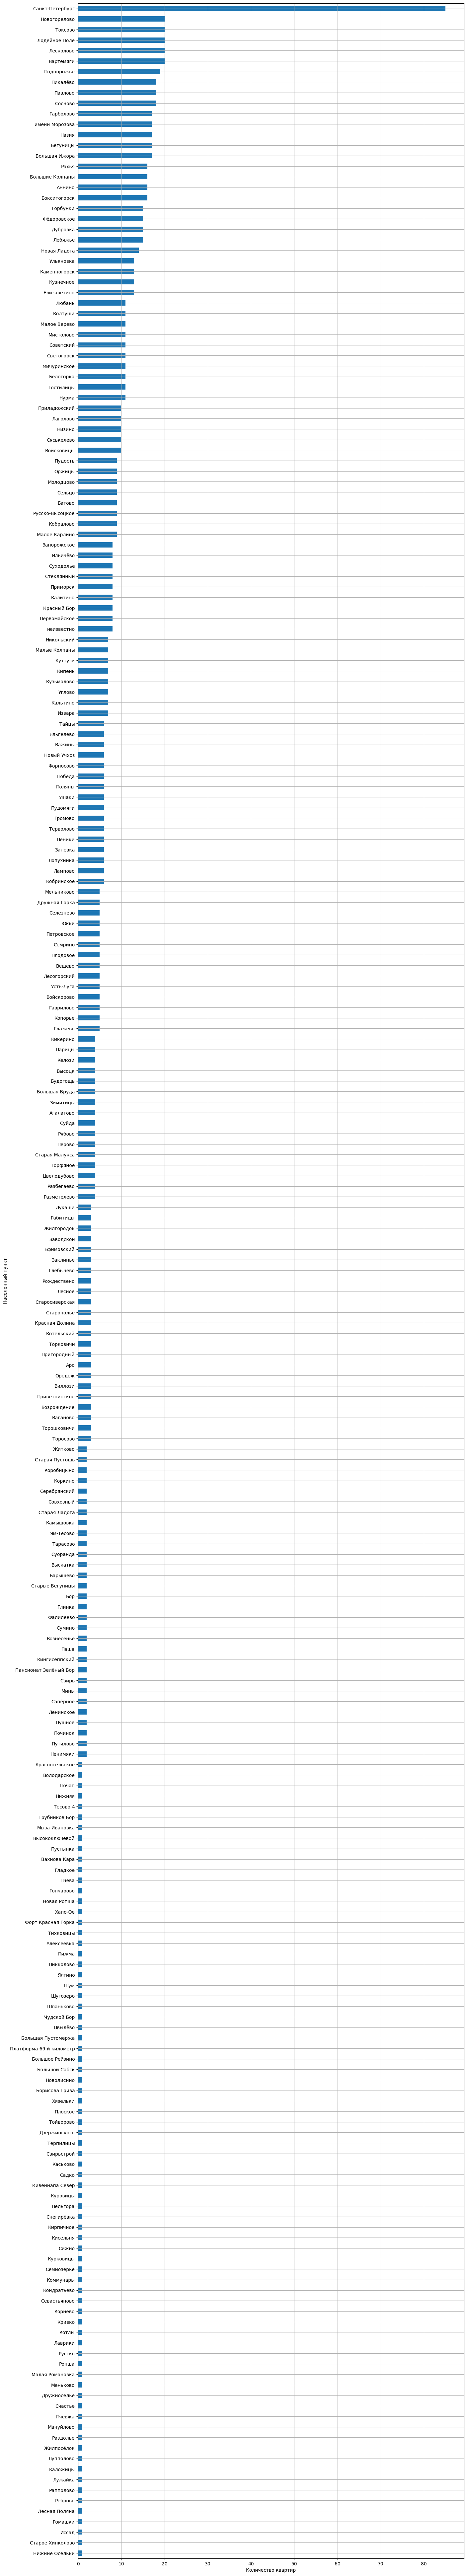

In [17]:
def add_airport_distance (raw):
# Создаем справочник loc_vithout_airports с расстояниями до Пулково, источник -- https://ru.distance.to/
# Пытался вытаскивать данные со страницы автоматом, но проиграл, заполнил вручную
    loc_vithout_airports = pd.Series([18540, 32890, 26500, 131390, 31090, 40590, 105660, 30860, 144950, 116180, 104660, 44440, 30610, 20640, 89750, 41400, 29750, 23120, 137980, 24710, 45330, 116560, 183660, 20590, 63430, 36380, 59590, 21420, 36770, 44400, 50560, 124380, 11070, 133030, 42910, 26950, 46200], \
                                     index=['Кудрово', 'Всеволожск', 'Гатчина', 'Выборг', 'Новое Девяткино', 'Сертолово', 'Кириши', 'Бугры', 'Сланцы', 'Волхов', 'Кингисепп', 'Тосно', 'Никольское', 'Коммунар', 'Сосновый Бор', 'Кировск', 'Отрадное', 'Янино-1', 'Приозерск', 'Старая', 'Шлиссельбург', 'Луга', 'Тихвин', 'Тельмана', 'Рощино', 'Романовка', 'Волосово', 'имени Свердлова', 'Кузьмоловский', 'Мга', 'Сиверский', 'Ивангород', 'Новоселье', 'Сясьстрой', 'Вырица', 'Новый Свет', 'Синявино'])

# заполняем медианами по справочнику для тех населенных пунктов, где сообще данных в источнике не было:    
    if raw['locality_name'] in loc_vithout_airports.index:
        return loc_vithout_airports[raw['locality_name']]
        
d_data.loc[d_data['airports_nearest'].isna(), 'airports_nearest'] = d_data.apply(add_airport_distance, axis=1)

d_data[d_data.airports_nearest.isna()].groupby('locality_name')['locality_name']\
.count().sort_values().plot(kind='barh', grid=True, figsize=(15, 100), xlabel='Количество квартир', ylabel='Населенный пункт');

Проверим, расстояние до центров каких городов в массиве данных

Выкинем сразу Санкт-Петербург и окрестности, тут нам и пригодится колонка 'class_loc':

In [18]:
d_data[(d_data['locality_name'] != 'Санкт-Петербург') & (d_data['class_loc'] != 'район Санкт-Петербурга (город)') & \
       (d_data['class_loc'] != 'район Санкт-Петербурга (посёлок)')].groupby('class_loc')['cityCenters_nearest'].count()

class_loc
город                         2
неизвестно                   15
поселок городского типа       0
сельский населенный пункт     1
Name: cityCenters_nearest, dtype: int64

Посмотрим, что за город и село, уберем также "неизвестно"

In [19]:
d_data[(d_data['locality_name'] != 'неизвестно') & (d_data['locality_name'] != 'Санкт-Петербург') & \
       (d_data['class_loc'] != 'район Санкт-Петербурга (город)') & (d_data['class_loc'] != 'район Санкт-Петербурга (посёлок)')]\
.groupby('locality_name')['cityCenters_nearest'].count().sort_values(ascending=False).head(3)

locality_name
Мурино       2
Щеглово      1
Агалатово    0
Name: cityCenters_nearest, dtype: int64

Мурино и Щеглово под Санкт-Петербургом, значит, речь только о нем и окрестностях.

Поэтому заполняем пропуски медианными значениями по начеленным пунктам (кроме Санкт-Петербурга и "неизвестно")

In [20]:
for locality in d_data.loc[(d_data['locality_name'] != 'Санкт-Петербург') & \
                           (d_data['locality_name'] != 'неизвестно'), 'locality_name'].unique():
    d_data.loc[(d_data['locality_name'] == locality) & (d_data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    d_data.loc[(d_data['locality_name'] == locality), 'cityCenters_nearest'].median()

###### Вероятные причины

Данные, очевидно, считаются автоматически от адреса.
Подозреваю, что адрес не удалось распознать, но тут не проверить -- данных по адресу нет.

Больше всего вопросов к квартирам, где нет расстояния до аэропорта, но заполнено расстояние до центра Санкт Петербурга.
Тут при передаче слетели, возможно.

##### 2.1.5 ceiling_height

Высота потолков пустует в 39% квартир.


Посмотрим, какие значения лежат в этой колонке

In [21]:
d_data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Хоть и преждевременно, но посмотрим, что это за квартиры (их всего 25) с высотой потолков больше десяти метров:

In [22]:
d_data[d_data['ceiling_height'] > 10].sort_values('last_price')

total_images  last_price  total_area first_day_exposition  rooms  \
14382             9   1700000.0        35.0  2015-12-04T00:00:00      1   
11285             0   1950000.0        37.0  2019-03-20T00:00:00      1   
21824            20   2450000.0        44.0  2019-02-12T00:00:00      2   
5246              0   2500000.0        54.0  2017-10-13T00:00:00      2   
3148             14   2900000.0        75.0  2018-11-12T00:00:00      3   
4876              7   3000000.0        25.0  2017-09-27T00:00:00      0   
6246              6   3300000.0        44.4  2019-03-25T00:00:00      2   
355              17   3600000.0        55.2  2018-07-12T00:00:00      2   
18545             6   3750000.0        43.0  2019-03-18T00:00:00      2   
10773             8   3800000.0        58.0  2017-10-13T00:00:00      2   
5076              0   3850000.0        30.5  2018-10-03T00:00:00      1   
17857             1   3900000.0        56.0  2017-12-22T00:00:00      3   
9379              5   3950000.0        42.0  2017-03-26T00:00:00      3   
22938            14   4000000.0        98.0  2018-03-15T00:00:00      4   
4643              0   4300000.0        45.0  2018-02-01T00:00:00      2   
5669              4   4400000.0        50.0  2017-08-08T00:00:00      2   
21377            19   4900000.0        42.0  2017-04-18T00:00:00      1   
22309            20   5300000.0        45.0  2017-09-30T00:00:00      1   
15061            19   5600000.0        56.4  2018-05-11T00:00:00      2   
20507            12   5950000.0        60.0  2018-02-19T00:00:00      2   
17496            15   6700000.0        92.9  2019-02-19T00:00:00      3   
20478            11   8000000.0        45.0  2017-07-18T00:00:00      1   
5807             17   8150000.0        80.0  2019-01-09T00:00:00      2   
22336            19   9999000.0        92.4  2019-04-05T00:00:00      2   
22869             0  15000000.0        25.0  2018-07-25T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  studio  ...  balcony  \
14382            25.0           5.0         20.0      2   False  ...      1.0   
11285            25.0           5.0         17.0      4   False  ...      2.0   
21824            27.0           2.0         38.0      2   False  ...      2.0   
5246             27.0           5.0         30.0      3   False  ...      2.0   
3148             32.0           3.0         53.0      2   False  ...      0.0   
4876             27.0          25.0         17.0     17   False  ...      2.0   
6246             25.0           5.0         31.3      5   False  ...      0.0   
355              25.0           5.0         32.0      2   False  ...      2.0   
18545            25.0           5.0         29.0      3   False  ...      0.0   
10773            27.0          10.0         30.1      3   False  ...      2.0   
5076             24.0           5.0         19.5      1   False  ...      0.0   
17857            27.0           5.0         33.0      4   False  ...      0.0   
9379             25.0           5.0         30.0      2   False  ...      0.0   
22938            27.0           2.0         73.0      2   False  ...      1.0   
4643             25.0           9.0         30.0      2   False  ...      1.0   
5669             26.0           9.0         21.3      3   False  ...      2.0   
21377            27.5          24.0         37.7     19   False  ...      2.0   
22309            10.3          16.0         15.5     15   False  ...      0.0   
15061            14.0          14.0         32.4      5   False  ...      2.0   
20507            22.6          14.0         35.0     11   False  ...      1.0   
17496            20.0          17.0         53.2     14   False  ...      5.0   
20478            27.0           4.0         22.0      2   False  ...      1.0   
5807             27.0          36.0         41.0     13   False  ...      5.0   
22336            32.0           6.0         55.5      5   False  ...      4.0   
22869           100.0          

Данные по этим квартирам, судя по всему, вносили вручную, не поставили запятую.
Выровняем данные на основе этой гипотезы:

In [23]:
d_data['ceiling_height'] = d_data['ceiling_height'].apply(lambda x: x / 10 if x > 10 else x)
d_data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

Слишком много, округлим до десятых

In [24]:
d_data['ceiling_height'] = d_data['ceiling_height'].round(1)
d_data['ceiling_height'].sort_values().unique()

array([ 1. ,  1.2,  1.4,  1.8,  2. ,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,
        2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
        5. ,  5.2,  5.3,  5.5,  5.6,  5.8,  6. ,  8. ,  8.3, 10. ,  nan])

Для заполнения данных о высоте потолков можно отталкиваться от цены за квадратный метр и от удаленности от центра города
Но так как одна из целей нашего исследовнаия -- выявление зависимости стоимости квартиры от ее атрибутов, кажется неправильным заполнять недостающие значения в атрибуте, основываясь на стоимости.

Поэтому для начала посмотрим на распределение значений, потом -- на высоту квартиры и удаленность ее от центра города.



In [25]:
def distance_center (row):
# Делим объявления на десять категорий по квантилям с шагом 0,1 в зависимсоти от удаленности от центра
    for q in range(1, 11):
        if d_data['cityCenters_nearest'].quantile((q - 1) / 10) < row <= d_data['cityCenters_nearest'].quantile(q / 10):
            return q
        
d_data['quant_distance_center'] = d_data['cityCenters_nearest'].apply(distance_center)

In [26]:
d_data.loc[:, ['locality_name', 'cityCenters_nearest', 'class_loc', 'quant_distance_center']].head(20)

locality_name  cityCenters_nearest                         class_loc  \
0   Санкт-Петербург              16028.0                             город   
1            Шушары              18603.0  район Санкт-Петербурга (посёлок)   
2   Санкт-Петербург              13933.0                             город   
3   Санкт-Петербург               6800.0                             город   
4   Санкт-Петербург               8098.0                             город   
5           Янино-1                  NaN           поселок городского типа   
6         Парголово              19143.0  район Санкт-Петербурга (посёлок)   
7   Санкт-Петербург              11634.0                             город   
8            Мурино              21888.0                             город   
9   Санкт-Петербург              15008.0                             город   
10  Санкт-Петербург              13878.0                             город   
11        Ломоносов              51677.0    район Санкт-Петербурга (город)   
12        Сертолово                  NaN                             город   
13         Петергоф              33058.0    район Санкт-Петербурга (город)   
14           Пушкин              30759.0    район Санкт-Петербурга (город)   
15  Санкт-Петербург              14259.0                             город   
16  Санкт-Петербург              10698.0                             город   
17  Санкт-Петербург              14616.0                             город   
18  Санкт-Петербург              10842.0                             город   
19  Санкт-Петербург              12843.0                             город   

    quant_distance_center  
0                     8.0  
1                     9.0  
2                     6.0  
3                     2.0  
4                     3.0  
5                     NaN  
6                     9.0  
7                     4.0  
8                     9.0  
9                     7.0  
10                    6.0  
11                   10.0  
12                    NaN  
13                   10.0  
14                   10.0  
15                    6.0  
16                    4.0  
17                    6.0  
18                    4.0  
19                    5.0

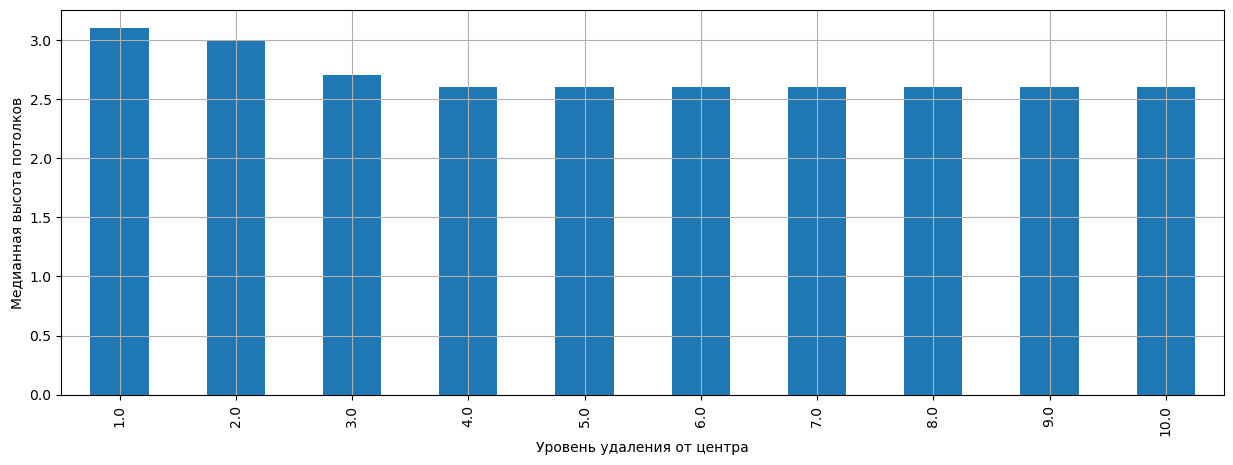

In [27]:
d_data.groupby('quant_distance_center')['ceiling_height'].median().plot(kind='bar', grid=True, figsize=(15, 5), \
                                                                        xlabel='Уровень удаления от центра', \
                                                                        ylabel='Медианная высота потолков');
# Строим график средней высоты квартиры от категории удаленности отцентра

In [28]:
for q in range (1, 11):
# Видим зависимость на графике выше, заполняем выстоу потолков медианами по категро=иям удаленности
    d_data.loc[(d_data['ceiling_height'].isna()) & (d_data['quant_distance_center'] == q), 'ceiling_height'] = \
    d_data.loc[d_data['quant_distance_center'] == q, 'ceiling_height'].median()

###### Вероятные причины

Данные вносятся вручную, не все точно знают высоту потолков, данные из документов могут быть неактуальны, так как существуют теплые полы, натяжные/подвесные потолки, а в Санкт Петербурге еще и лепнина, что может съесть до тридцати сантиметров где-то. Непонятно, что именно вносить, измерять не хочется, вот данные и не вносят.

##### 2.1.6 days_exposition

Объявления могли быть активны на момент выгрузки.
Если это не так, в выгрузке только закрытые объявления, то нужно искать причину, почему данные слетают при заполнении или передаче.

Так или иначе, если объявления открытые, то их параметры лучше не использовать, данные могут измениться.
Поэтому строчки без days_exposition.

###### Вероятные причины

Либо активные объявления, либо сбой (закрытые объявления)

In [29]:
d_data = d_data.dropna(subset=['days_exposition'])
d_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20518 entries, 1 to 23697
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           20518 non-null  int64  
 1   last_price             20518 non-null  float64
 2   total_area             20518 non-null  float64
 3   first_day_exposition   20518 non-null  object 
 4   rooms                  20518 non-null  int64  
 5   ceiling_height         18603 non-null  float64
 6   floors_total           20441 non-null  float64
 7   living_area            18813 non-null  float64
 8   floor                  20518 non-null  int64  
 9   studio                 20518 non-null  bool   
 10  open_plan              20518 non-null  bool   
 11  kitchen_area           18443 non-null  float64
 12  balcony                20518 non-null  float64
 13  locality_name          20518 non-null  object 
 14  airports_nearest       19495 non-null  float64
 15  cityCen

##### 2.1.7 living_area, kitchen_area

Заполнить нечем -- разнообразие планировок велико, а данных по адресам у нас нет.

###### Вероятные причины

Значения заполняются вручную, а в форме нет подсказок, что такое жилая площадь, как считать площадь кухни в студии, что делать в случае свободной планировки и прочее, вот и не заполняют.

##### 2.1.8 floors_total, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest

Эти колонки заполняются автоматически из адреса, других источников вменяемых обнаружить не удалось.

Разве что, для Санкт-Петербурга можно посмотреть этажность домов и удаленность от центра:

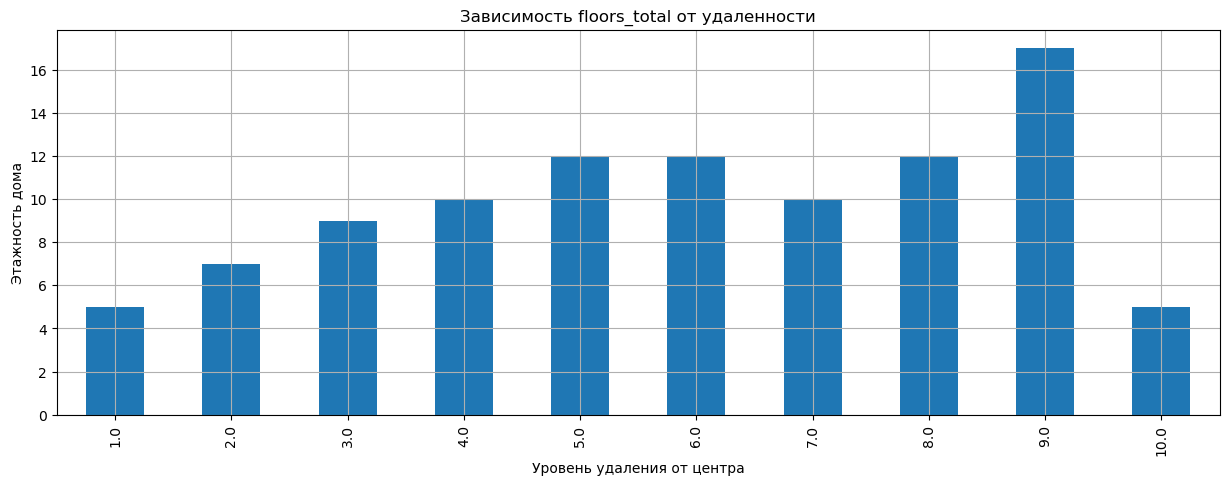

In [30]:
axes = d_data.groupby('quant_distance_center')['floors_total'].median().plot(kind='bar', grid=True, figsize=(15, 5), \
                                                                             xlabel='Уровень удаления от центра', \
                                                                             ylabel='Этажность дома', \
                                                                             title = 'Зависимость floors_total от удаленности');

Зависимость, очевидно, есть, но к этажности домов я предлагаю относиться аккуратно и делать выводы только на тех объявлениях, где есть достоверные данные, так как от того, находится ли квартира на последнем этаже, заметно растет/падает ее стоимость.

Отсутствующих значений в floors_total изчезающе мало -- 86, поэтому дропаем их:

In [31]:
d_data = d_data.dropna(subset=['floors_total'])
d_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20441 entries, 1 to 23697
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           20441 non-null  int64  
 1   last_price             20441 non-null  float64
 2   total_area             20441 non-null  float64
 3   first_day_exposition   20441 non-null  object 
 4   rooms                  20441 non-null  int64  
 5   ceiling_height         18532 non-null  float64
 6   floors_total           20441 non-null  float64
 7   living_area            18766 non-null  float64
 8   floor                  20441 non-null  int64  
 9   studio                 20441 non-null  bool   
 10  open_plan              20441 non-null  bool   
 11  kitchen_area           18409 non-null  float64
 12  balcony                20441 non-null  float64
 13  locality_name          20441 non-null  object 
 14  airports_nearest       19419 non-null  float64
 15  cityCen

###### Вероятные причины

Так же как и с расстояниями до аэропорта/центра, я думаю. Чисто технические проблемы с распознованием адреса, недостаток информации в связнанных источниках данных, сбои при передаче/выгрузке.

## Шаг 3 Добавление в таблицу новых столбцов

Делаем раньше, чем изменение типов, чтоб расчитать на неокругленных данных (кроме даты-времени, это сделаем по ходу вычислений)

Нужно довнести:

 - цена одного квадратного метра
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
 - месяц публикации объявления
 - год публикации объявления
 - тип этажа квартиры (значения — «первый», «последний», «другой»)
 - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)
 
 тут чисто техника, без особых пояснений:

In [32]:
# цена одного квадратного метра
d_data['price_pro_square_meter'] = (d_data['last_price'] / d_data['total_area']) // 1

# переводим first_day_exposition в datetime
d_data['first_day_exposition'] = pd.to_datetime(d_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# добавляем день недели, месяц и год
d_data['date_exposition_dow_num'] = pd.DatetimeIndex(d_data['first_day_exposition']).weekday
# d_data['date_exposition_dow_name'] = pd.DatetimeIndex(d_data['first_day_exposition']).day_name(locale='ru_RU')
d_data['date_exposition_month_num'] = pd.DatetimeIndex(d_data['first_day_exposition']).month
# d_data['date_exposition_month_name'] = pd.DatetimeIndex(d_data['first_day_exposition']).month_name(locale='ru_RU')
d_data['date_exposition_year'] = pd.DatetimeIndex(d_data['first_day_exposition']).year

# тип этажа квартиры 
# тут для обучения была цель обойтись только "where"

d_data['class_floor'] = 0
d_data['class_floor'] = d_data.where(d_data['floor'] != 1, 'первый')['class_floor']
d_data['class_floor'] = d_data.where((d_data['floor'] != d_data['floors_total']) | (d_data['floor'] == 1), \
                                     'последний')['class_floor']
d_data['class_floor'] = d_data.where((d_data['class_floor'] == 'первый') | (d_data['class_floor'] == 'последний'), \
                                     'другой')['class_floor']

# расстояние до центра в километрах

d_data['cityCenters_nearest_km'] = d_data['cityCenters_nearest'] // 1000

# смотрим, что вышло:
d_data[['price_pro_square_meter', 'first_day_exposition', 'date_exposition_month_num', \
        'date_exposition_year', 'class_floor', 'cityCenters_nearest_km']].head(5)

price_pro_square_meter first_day_exposition  date_exposition_month_num  \
1                 82920.0           2018-12-04                         12   
2                 92785.0           2015-08-20                          8   
3                408176.0           2015-07-24                          7   
4                100000.0           2018-06-19                          6   
5                 95065.0           2018-09-10                          9   

   date_exposition_year class_floor  cityCenters_nearest_km  
1                  2018      первый                    18.0  
2                  2015      другой                    13.0  
3                  2015      другой                     6.0  
4                  2018      другой                     8.0  
5                  2018      другой                     NaN

### 3.1 Изменение типов

Посмотрим, что у нас осталось из того, что можно поменять:

In [33]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20441 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               20441 non-null  int64         
 1   last_price                 20441 non-null  float64       
 2   total_area                 20441 non-null  float64       
 3   first_day_exposition       20441 non-null  datetime64[ns]
 4   rooms                      20441 non-null  int64         
 5   ceiling_height             18532 non-null  float64       
 6   floors_total               20441 non-null  float64       
 7   living_area                18766 non-null  float64       
 8   floor                      20441 non-null  int64         
 9   studio                     20441 non-null  bool          
 10  open_plan                  20441 non-null  bool          
 11  kitchen_area               18409 non-null  float64       
 12  balcony  

- **last_price** -> int\
    Отбрасываем копейки
- **total_area, living_area, kitchen_area**\
    Оставлю float -- десятые квадрата значимы, округлю до них
- **first_day_exposition**\
    Готово в рамках 3.2
- **ceiling_height**\
    Оставлю float, до десятых округлили в рамках 3.1.5
- **floors_total** -> int\
    Очевидно, но надо проверить значения на всякий. Должны быть целые.
- **balcony** -> int\
    Очевидно, но надо проверить значения на всякий. Должны быть целые.
- **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, cityCenters_nearest_km**\
    Хорошо бы в int, но в столбиках есть много NaN, в Python не хочет переводить такие столбца в int    
    Теоретически можно было бы заполнить значениями "-1", например, но потом фильтровать их -- еще большее зло    
    Опять же, парки нам не понадобятся, эти два столбца и дропнуть не жалко
- **days_exposition** -> int\
    Очевидно, но надо проверить значения на всякий. Должны быть целые.
- **price_pro_square_meter** -> int\
    Отбрасываем копейки

In [34]:
print(d_data.loc[d_data['floors_total'] % 1 > 0, ['floors_total']])
print(d_data.loc[d_data['balcony'] % 1 > 0, ['balcony']])
print(d_data.loc[d_data['days_exposition'] % 1 > 0, ['days_exposition']])

Empty DataFrame
Columns: [floors_total]
Index: []
Empty DataFrame
Columns: [balcony]
Index: []
       days_exposition
8                189.0
12                90.0
13               366.0
41               179.0
43               763.0
...                ...
23675            721.0
23679             45.0
23686            193.0
23688             23.0
23695             45.0

[3985 rows x 1 columns]


Видим, что везде все ОК кроме days_exposition, но там похоже, что артефакты далеко справа за запятой остались. Проверим и это:

In [35]:
d_data.loc[d_data['days_exposition'] % 1 > 0, ['days_exposition']].sort_values('days_exposition', ascending=False) % 1

days_exposition
9553      2.273737e-13
1885      2.273737e-13
20969     2.273737e-13
6691      2.273737e-13
14093     2.273737e-13
...                ...
14979     4.440892e-16
14807     4.440892e-16
4062      4.440892e-16
22555     4.440892e-16
3523      4.440892e-16

[3985 rows x 1 columns]

$e-13$ -- ничтожно мало, поэтому смело меняем типы:

In [36]:
d_data['floors_total'] = d_data['floors_total'].astype('int')
d_data['balcony'] = d_data['balcony'].astype('int')
d_data['price_pro_square_meter'] = d_data['price_pro_square_meter'].astype('int')
d_data['last_price'] = d_data['last_price'].astype('int')
d_data['days_exposition'] = d_data['days_exposition'].astype('int')
d_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20441 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               20441 non-null  int64         
 1   last_price                 20441 non-null  int32         
 2   total_area                 20441 non-null  float64       
 3   first_day_exposition       20441 non-null  datetime64[ns]
 4   rooms                      20441 non-null  int64         
 5   ceiling_height             18532 non-null  float64       
 6   floors_total               20441 non-null  int32         
 7   living_area                18766 non-null  float64       
 8   floor                      20441 non-null  int64         
 9   studio                     20441 non-null  bool          
 10  open_plan                  20441 non-null  bool          
 11  kitchen_area               18409 non-null  float64       
 12  balcony  

## Шаг 4 Исследовательский анализ данных


### 4.1 Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров

Список параметров:
 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - тип этажа квартиры («первый», «последний», «другой»);
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего парка


Подозреваю, что мы будем работать с выбивающимися значениями, поэтому создадим промежуточную точку восставновления, чтоб не перезагружать весь блокнот.

In [37]:
try:
# сохраняем датафрейм в файлик
    d_data.to_csv(r'C:\Users\Oleg\anaconda3\05SPRINT\clean_data.csv', sep='\t')
except:
    print('Режим проверки активирован')

In [38]:
try:
    clean_data = pd.read_csv('clean_data.csv', sep='\t')
# Достаем файлик из сохранения
except:
# для проверки работы сохранять файл не нужно, поэтому прост перезапишу датафреймы
    clean_data = d_data

Для изучения параметров потребуется много раз один и тот же набор инструментов -- гистограмма, диаграмма размаха и describe().

Определим функцию для вывода данных:

In [39]:
def display_param (ser, d_bins=50, start=-1, end=-1):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    # вариант для первоначальной прикидки по всей области значений
    if start == -1 or end == -1:
        print(clean_data[ser].describe())
        clean_data[ser].plot(kind='hist', title=ser, bins=d_bins, ec='grey', linewidth=0.5, ax=axes[0], \
                             figsize=(15, 3), grid=True) # гистограмма
        clean_data.boxplot(column=ser, ax=axes[1]); # диаграмма размаха
        
    # вариант для более детального анализа области без выбросов
    else:
        clean_data[ser].plot(kind='hist', title=ser, bins=d_bins, ec='grey', linewidth=0.5, ax=axes[0], \
                             figsize=(15, 3), xlim=(start, end), grid=True) # гистограмма с ограничением
        clean_data.boxplot(column=ser, ax=axes[1]) # диаграмма размаха с ограничением
        axes[1].set_ylim([start, end]);
    

#### 4.1.1 Параметр "общая площадь"

count    20441.000000
mean        58.857697
std         34.061930
min         12.000000
25%         39.580000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64


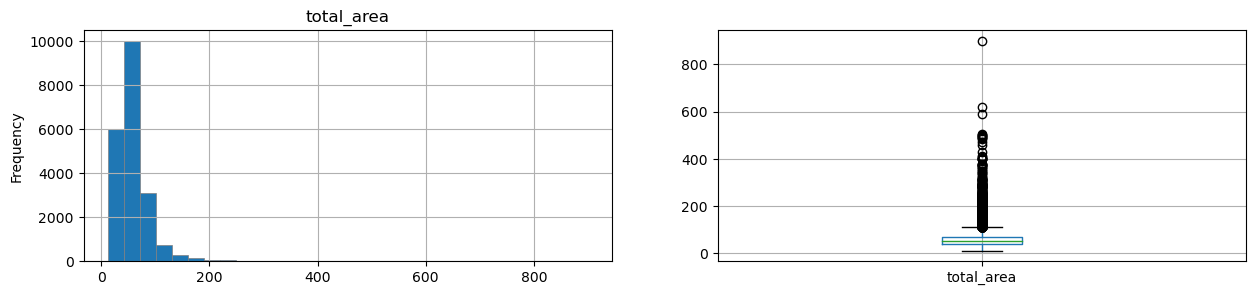

In [40]:
display_param('total_area', 30)

Ограничиваем с 15 до 150 квадратных метров:

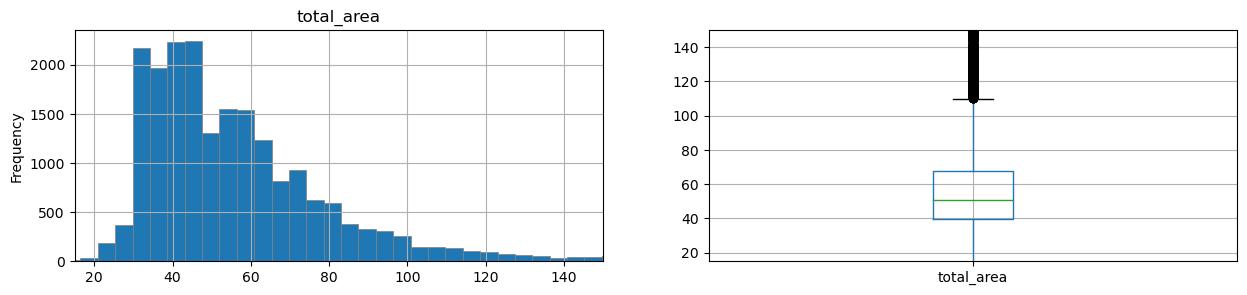

In [41]:
display_param('total_area', d_bins=200, start=15, end=150)

Вывод по гистограмме:
1. Большинство квартир на рынке от 30-и до 50-и квадратных метров
2. После 50-и квадратных метров количество квартир падает с ростом площади
3. Есть и монструозные квартиры от 300 до 900 квадратных метров, но их ничтожно мало, посмотрим, ошибка ли это или реальность:

In [42]:
clean_data.loc[(clean_data['total_area'] >= 300) & (clean_data['total_area'] <= 900), \
               ['last_price', 'total_area', 'living_area', 'kitchen_area', 'locality_name', \
                'price_pro_square_meter', 'quant_distance_center']].sort_values('total_area', ascending=False).head(10)

last_price  total_area  living_area  kitchen_area    locality_name  \
16873   420000000       900.0        409.7         112.0  Санкт-Петербург   
13498   300000000       618.0        258.0          70.0  Санкт-Петербург   
4611     65000000       590.0        409.0         100.0  Санкт-Петербург   
6921     84000000       507.0        301.5          45.5  Санкт-Петербург   
12953   150000000       500.0          NaN           NaN  Санкт-Петербург   
5071    230000000       500.0          NaN          40.0  Санкт-Петербург   
10684    91500000       495.0        347.5          25.0  Санкт-Петербург   
8475     43185328       494.1          NaN           NaN  Санкт-Петербург   
19396    91075000       491.0        274.0          45.0  Санкт-Петербург   
5695     99000000       488.0        216.0          50.0  Санкт-Петербург   

       price_pro_square_meter  quant_distance_center  
16873                  466666                    2.0  
13498                  485436                    2.0  
4611                   110169                    1.0  
6921                   165680                    2.0  
12953                  300000                    2.0  
5071                   460000                    2.0  
10684                  184848                    2.0  
8475                    87401                    2.0  
19396                  185488                    2.0  
5695                   202868                    1.0

Судя по всему, да -- это реальные квартиры с Санкт-Петербурге, тогда оставляем.

#### 4.1.2 Параметр "жилая площадь"

count    18766.000000
mean        33.538914
std         21.322206
min          2.000000
25%         18.300000
50%         30.000000
75%         41.600000
max        409.700000
Name: living_area, dtype: float64


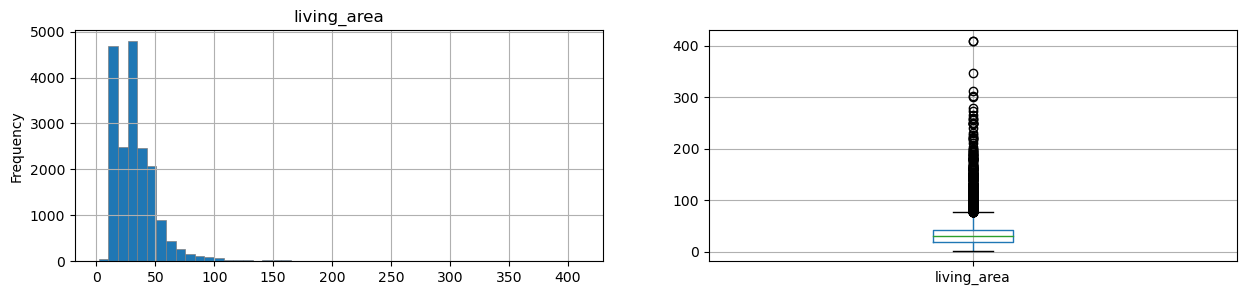

In [43]:
display_param('living_area')

Ограничиваем с 0 до 100 квадратных метров:

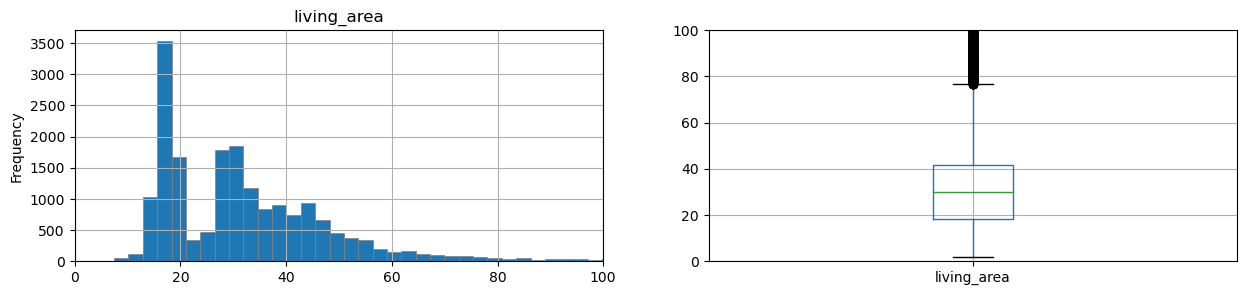

In [44]:
display_param('living_area', d_bins=150, start=0, end=100)

Вывод по гистограмме:
1. Видим два явных пика -- от 15 до 20-и квадратных метров и от 26-и дл 35-и квадратных метров. А между ними провал.

    Мы данные по площади не заполняли, это реальные значения. Могу объяснить лишь тем, что планировки в жилом фонде более-менее типовые и мы наблюдаем скачок от однокомнатных до многокомнатных квартир

2. После 45-и квадратных метров количество квартир падает с ростом жилой площади
3. По большим жилым площадям выводы аналогичны предыдущему пункту с общей площадью

#### 4.1.3 Параметр "площадь кухни"

count    18409.000000
mean        10.430314
std          5.680078
min          2.000000
25%          7.000000
50%          9.100000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64


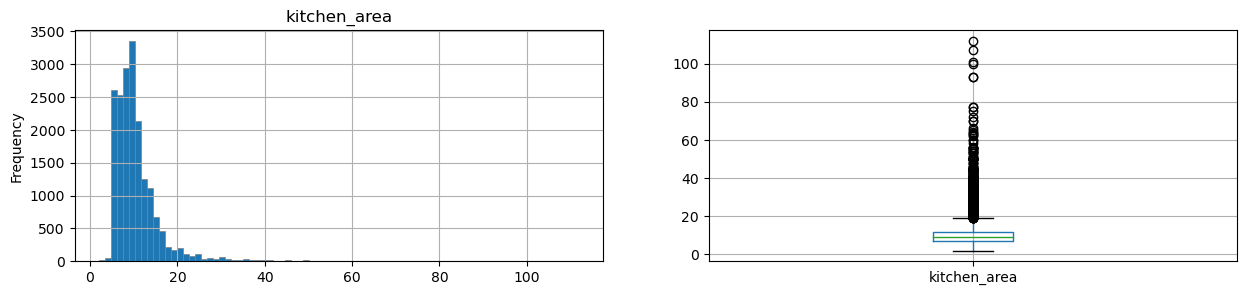

In [45]:
display_param('kitchen_area', 80)

Ограничиваем с 3 до 70 квадратных метров:

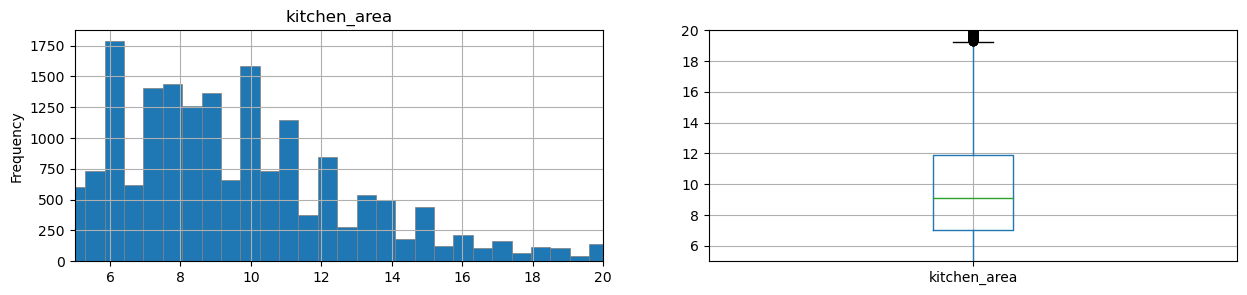

In [46]:
display_param('kitchen_area', d_bins=200, start=5, end=20)

Вывод по гистограмме:

1. Кухни домов постройки второй половины двадцатого века имеют быолее-менее стандартный набор площадей, этим можно объяснить гребенку на гистограмме. Самые распространенные варианты кухонь тех лет -- шесть и десять квадратных метров

2. После 10-и квадратных метров количество квартир падает с ростом площади кухни

3. По большим площадям кухни выводы аналогичны предыдущему пункту с общей площадью

#### 4.1.4 Параметр "цена объекта"

count    2.044100e+04
mean     6.265166e+06
std      1.087821e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64


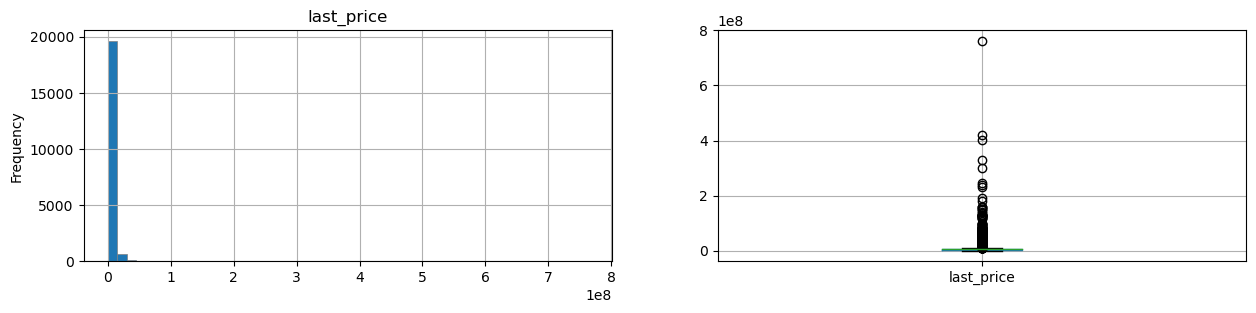

In [47]:
display_param('last_price')

Ограничиваем с 0 до 15 миллионов рублей:

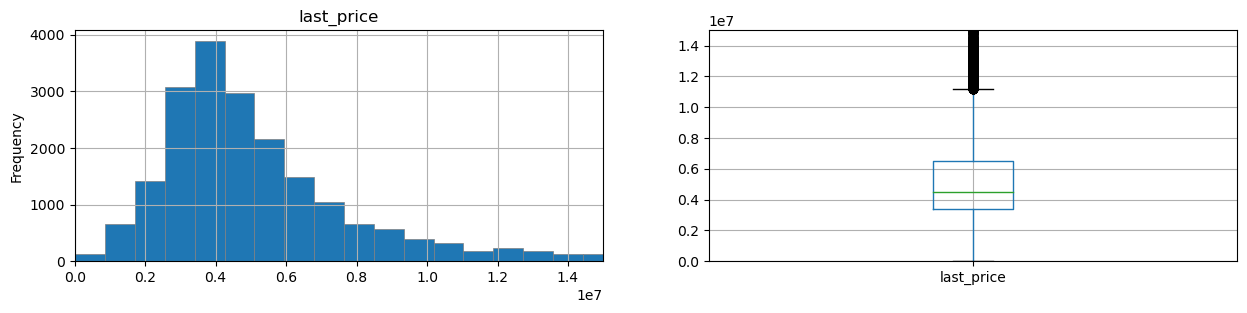

In [48]:
display_param('last_price', d_bins=900, start=0, end=15000000)

Вывод по гистограмме:
1. Большинство квартир на рынке недвижимсоти стоят от 3-х до 6-и миллионов рублей
2. После 4-х миллионов с ростом стоимости квартиры падает их количество
3. Существует небольшое количество сверхдорогих квартир, которые портят нам гистограмму, однако, как мы выяснили выше, они вполне реальны

#### 4.1.5 Параметр "количество комнат"

count    20441.000000
mean         2.024999
std          1.055000
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


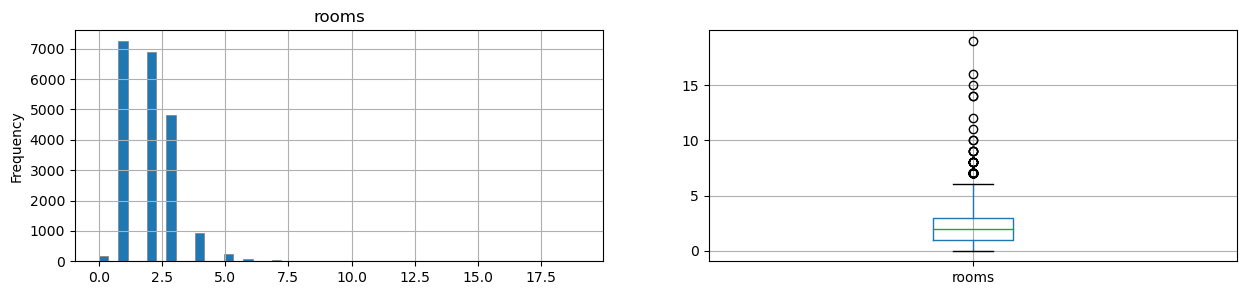

In [49]:
display_param('rooms')

Ограничиваем с 0 до 6 комнат:

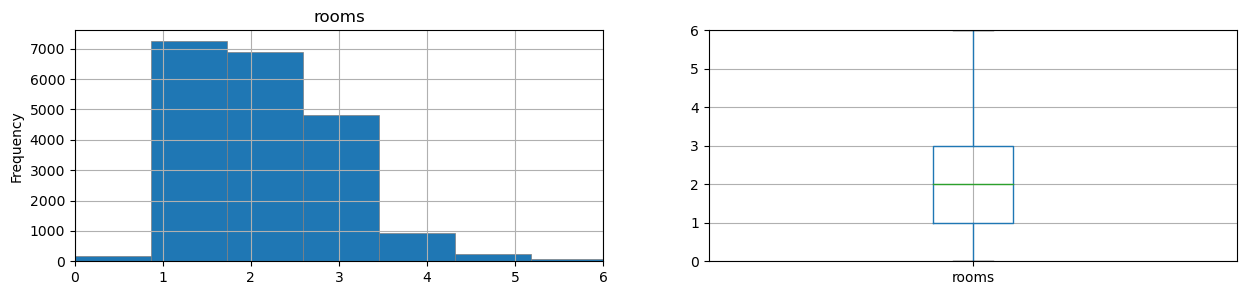

In [50]:
display_param('rooms', d_bins=22, start=0, end=6)

Вывод по гистограмме:
1. Большинство квартир на рынке от одной до двух комнат, разница по количеству между ними незначительна
2. Трехкомнатных квартир на четверть меньше, допустим, однокомнатных, но уже в разы больше квартир с бОльшим количеством комнат
3. Есть квартиры с количеством комнат до 19-и, но мы их уже рассматривали ранее

#### 4.1.6 Параметр "высота потолков"

count    18532.000000
mean         2.713744
std          0.261012
min          1.000000
25%          2.600000
50%          2.600000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64


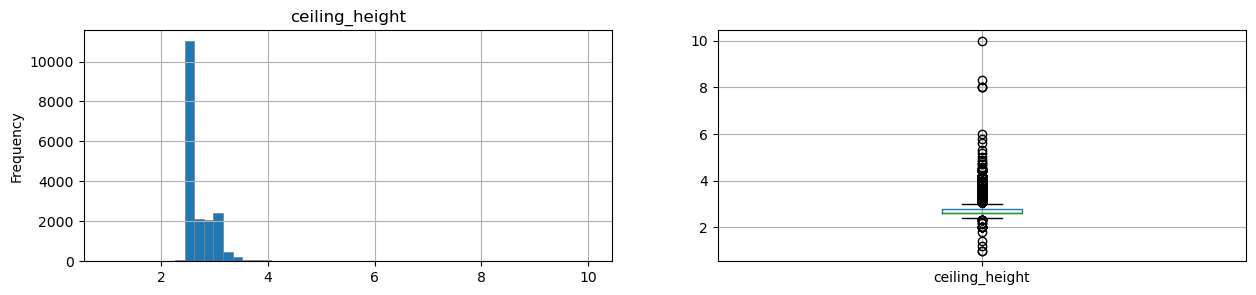

In [51]:
display_param('ceiling_height')

Ограничиваем с 2,2 до 3,7 метров:

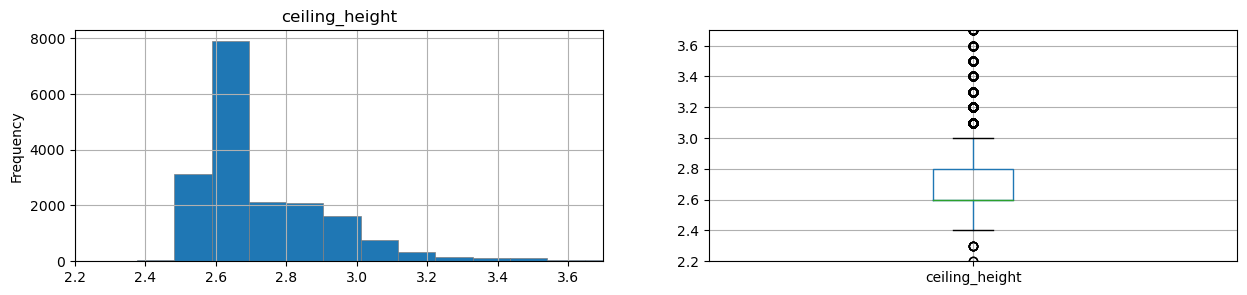

In [52]:
display_param('ceiling_height', d_bins=85, start=2.2, end=3.7)

Вывод по гистограмме:
1. Большинство квартир 2,6-2,7 метров в высоту, далее -- 2,5-2,6 метров, после этого наблюдаем снижение количества квартир до трех метров, после этого -- падение до незначительного количества
2. На рынке также представлено незначительное количество квартир с высотой потолков больше четырех метров

#### 4.1.7 Параметр "тип этажа квартиры"
Тут три элемента всего, поэтому просто посмотрим на распределение

count      20441
unique         3
top       другой
freq       15156
Name: class_floor, dtype: object

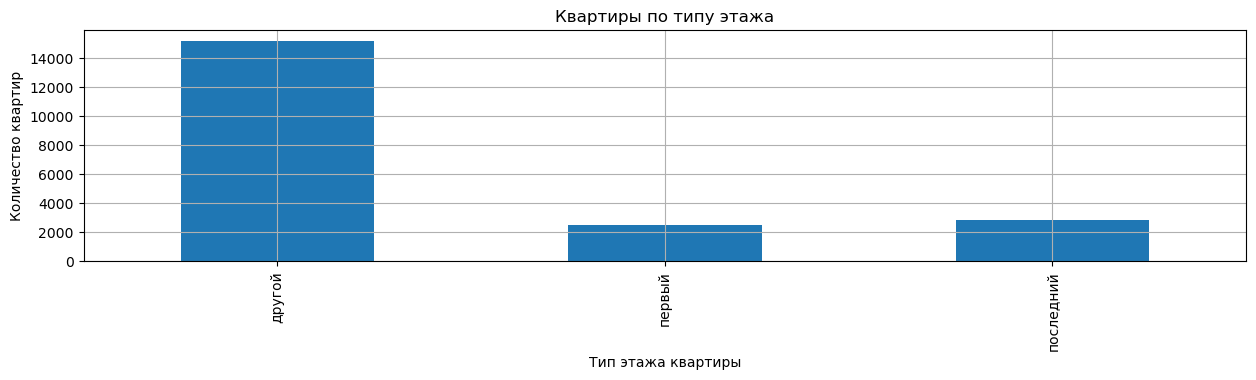

In [53]:
display(clean_data['class_floor'].describe())
clean_data.groupby('class_floor')['class_floor'].count().plot(kind='bar', figsize=(15, 3), grid=True, \
                                                              xlabel='Тип этажа квартиры', 
                                                              ylabel='Количество квартир', \
                                                              title = 'Квартиры по типу этажа');

Вывод по гистограмме:
1. 74% от всех квартир ни на первом, ни на последнем этаже, количество по первому и последнему этажу примерно равно -- в пять-шесть раз меньше, чем квартир между ними.

#### 4.1.8 Параметр "общее количество этажей в доме"

count    20441.000000
mean        10.860770
std          6.652375
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


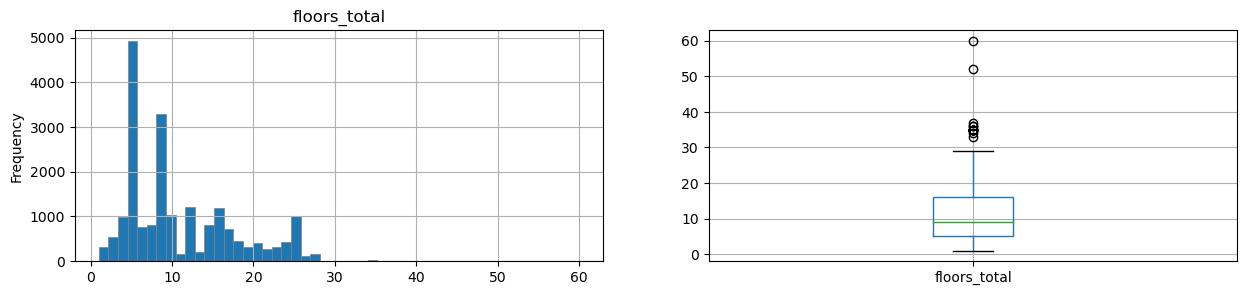

In [54]:
display_param('floors_total')

Ограничиваем с 1 до 30 этажей в доме:

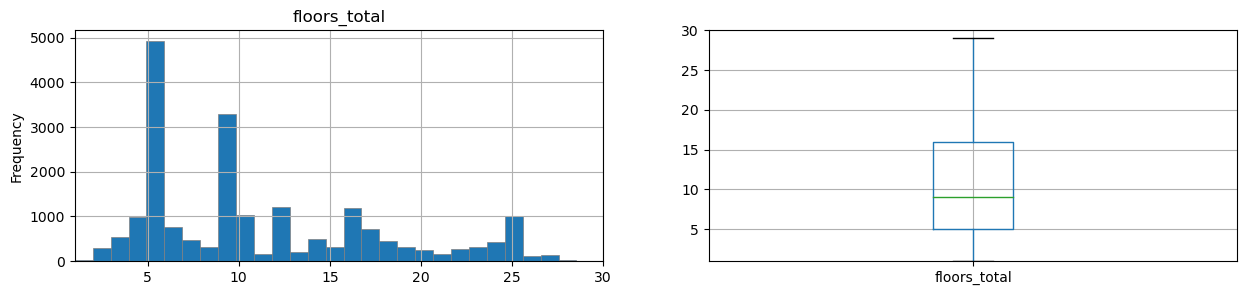

In [55]:
display_param('floors_total', d_bins=60, start=1, end=30)

Вывод по гистограмме:
1. Больше всего пятиэтажек и девятиэтажек, наследие типового строительства XX века. До пятого этажа включительно можно было строить без лифта, ограничение в девять этажей продиктовано нормативами по пожарной безопасности -- с увеличением количества этажей необходимо было ставить дополнительный лифт, а пожарная техника по умолчанию не доставала бы до верхних этажей

2. Существуют еще пики около 12, 16 и 25 этажей, про них я информацию не нашел, но тоже, судя по всему, влияние популярных типовых проектов или нормативов для строительства

#### 4.1.9 Параметр "расстояние до центра города в метрах"

count    16372.000000
mean     14572.403524
std       8563.816441
min        208.000000
25%       9666.250000
50%      13354.000000
75%      16825.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


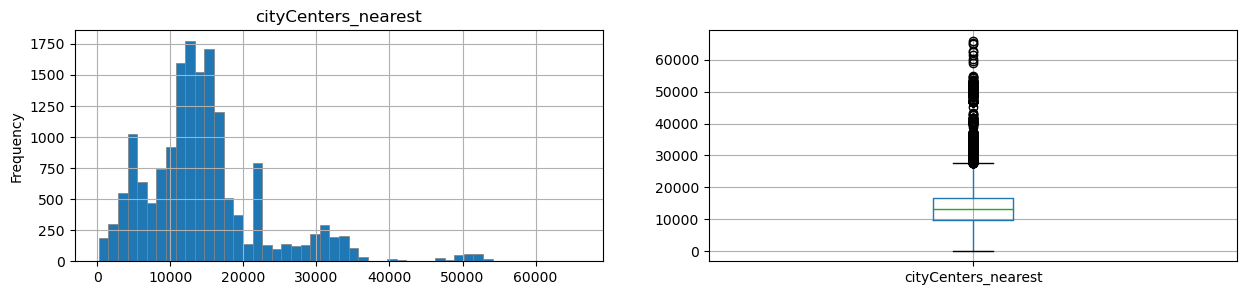

In [56]:
display_param('cityCenters_nearest')

Ограничиваем с 0 до 55 километров от центра:

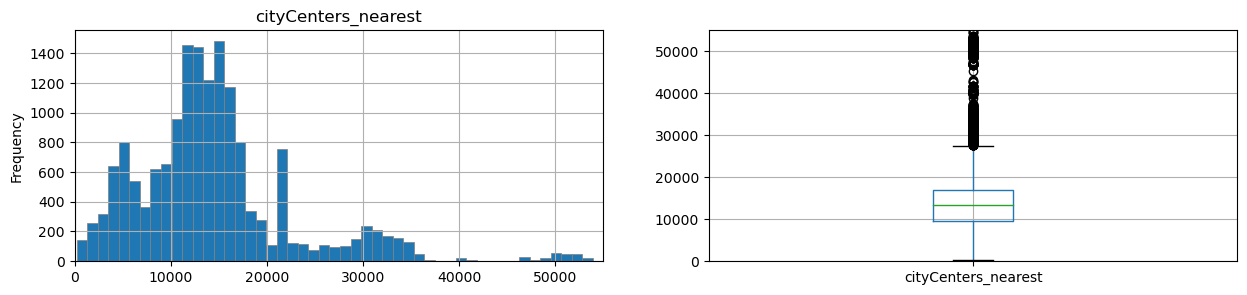

In [57]:
display_param('cityCenters_nearest', d_bins=60, start=0, end=55000)

Вывод по гистограмме:

1. Два пика внутри Санкт-Петербурга -- с трёх до семи километров от центра и с восьми до семнадцати километров.
2. Далее пики формируют добавленные города-поселки внутри Санкт-петербурга, а также города-сателлиты -- Парголово, Шушары, например. Особый всплеск на 21-м километре нам обеспечивает Мурино, далее уже более плавно до 37-го килоетра.
3. Псоледний всплеск - три города: Ломоносов, Кронштадт и Зеленогорск соответсвенно. С 48-го до 63-й километр.
4. На 64-65-м километре -- пять квартир в Молодежном, что обеспечило нам выброс
5. Основной массив квартир внутри трёх и четырнадцати километров от центра Санкт-Петербурга

#### 4.1.10 Параметр "расстояние до ближайшего парка"

count    6902.000000
mean      490.796436
std       344.370477
min         1.000000
25%       287.000000
50%       451.500000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


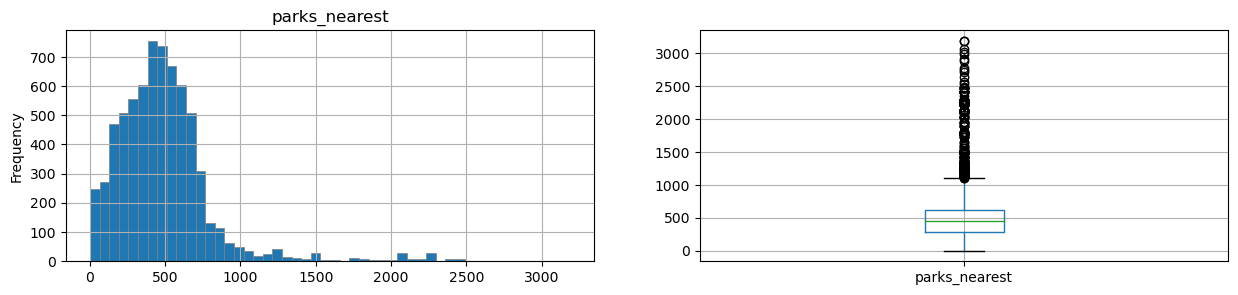

In [58]:
display_param('parks_nearest')

Ограничиваем с 0 до 1,2 км до парка:

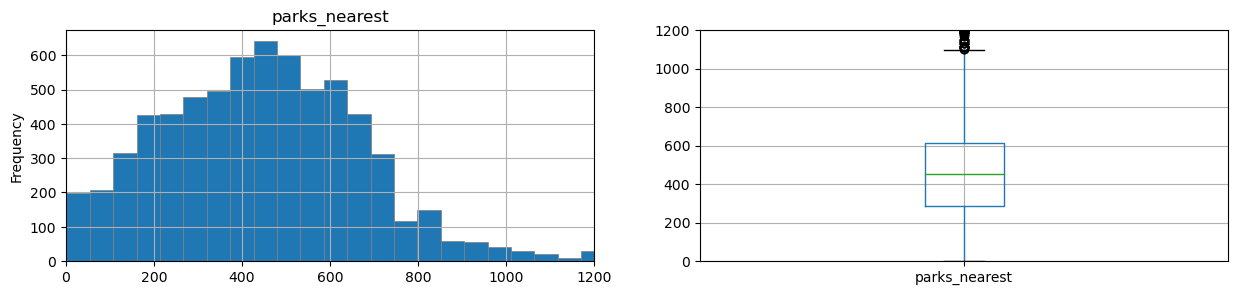

In [59]:
display_param('parks_nearest', d_bins=60, start=0, end=1200)

Вывод по гистограмме:
1. Судя по всему, данные искусственно ограничены тремя километрами, что рифмуется с описанием атрибута "parks_around3000 — число парков в радиусе 3 км"
2. Если парк есть в радиусе трёх километров, то большинство парков всё же на расстоянии от ста до семьсот пятидесяти метров от квартиры. То есть, если в инфраструктуре района парки предусмотрены, то их стараются распологать в непосредственной близости от жилых массивов. Альтернатива -- отсутствие парка в трехкилометровом радиусе.

### 4.2 Изучите, как быстро продавались квартиры

Построим гистограмму по days_exposition. Наша функция на первом этапе пригодится и тут

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


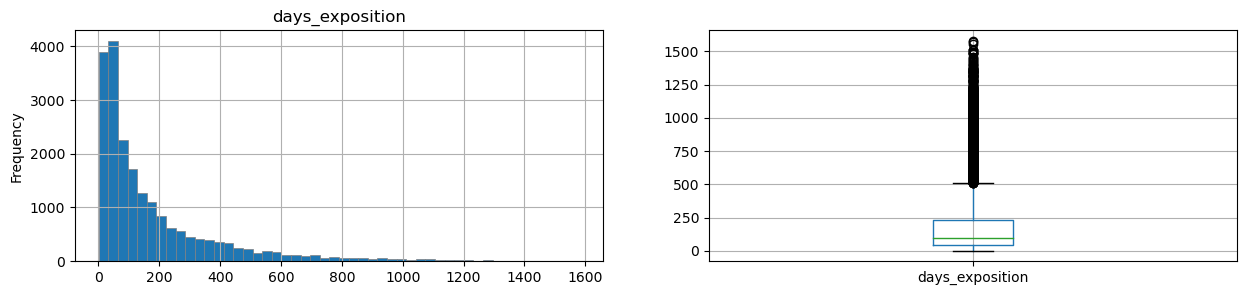

In [60]:
display_param('days_exposition')

Уже видно, что большинство квартир продаются за первые сто дней, но есть и те, что до четырех лет висели перед продажей.
Посмотрим на распределение поближе -- от нуля до тысячи.

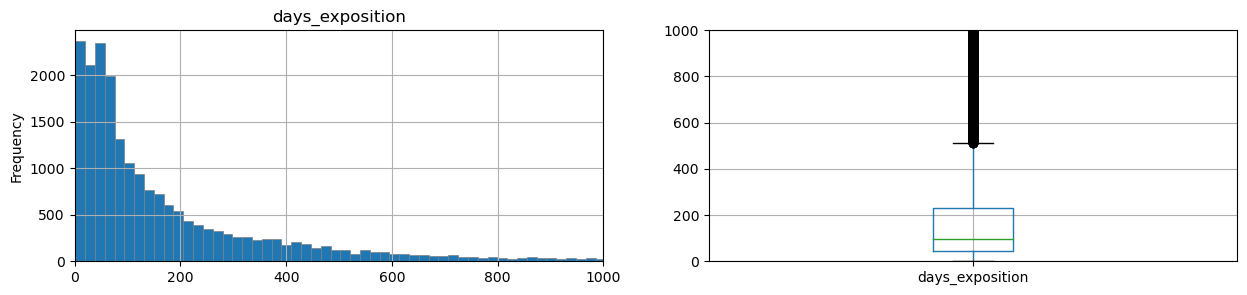

In [61]:
display_param('days_exposition', d_bins=85, start=0, end=1000)

Судя по динамике, если квартира не продалась за первые сто дней, то чем дальше, тем сложнее будет ее продать -- падение количества нелинейно с течением времени

Посмотрим внимательнее на рожки от нуля до ста:

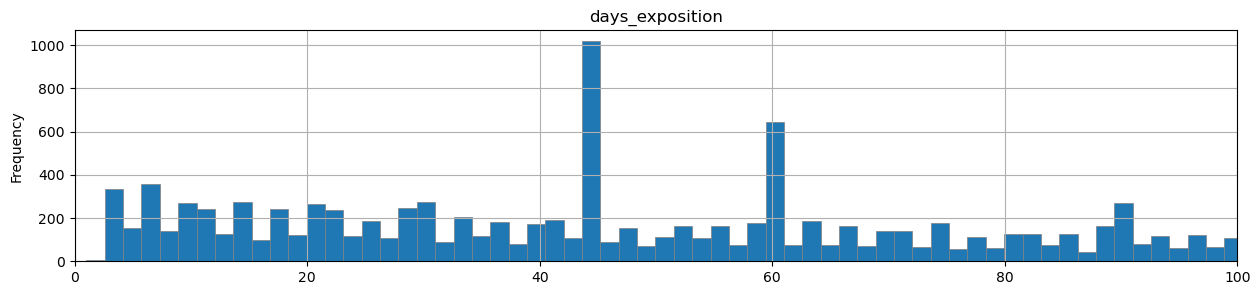

In [62]:
clean_data['days_exposition'].plot(kind='hist', \
                                   title='days_exposition', \
                                   bins=1000, \
                                   ec='grey', \
                                   linewidth=0.5, \
                                   figsize=(15, 3), \
                                   grid=True, \
                                   xlim=(0, 100));

Три пика -- 45, 60 и 90(возможно) дней.
Похоже на робота, которые работает по каким-то своим фильтрам. Прикрывать объявление после сорока пяти дней бездействия (например). Как-то странно. Рекомендую выяснить у команды Развития или Сопровождения, что это за круглые даты такие.

### 4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучите, зависит ли цена от:
 - общей площади
 - жилой площади
 - площади кухни
 - количества комнат
 - этажа, на котором расположена квартира (первый, последний, другой)
 - даты размещения (день недели, месяц, год)
 
 Опять однообразные визуализации -- строим функцию:

In [63]:
def price_depend (ser, x_start=-1, x_end=-1, y_start=-1, y_end=-1):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    if x_start == -1 or x_end == -1 or y_start == -1 or y_end == -1: # в этот раз делаем ограничение по двум уже осям
        print(clean_data[['last_price', ser]].corr()) # Сначала циферки
        
        # Диаграмма scatter без медианизации
        clean_data.plot(kind='scatter', \
                        x=ser, y='last_price', ax=axes[0], \
                        figsize=(15, 4), grid=True, \
                        alpha=0.3, title='scatter без median') 
        
        # для наглядности прогнал стоимость через медиану, но для этого пришлось вытащить индекс в колонку
        clean_data.pivot_table(index=ser, values='last_price', aggfunc='median').reset_index().\
        plot(kind='scatter', x=ser, \
             y='last_price', ax=axes[1], \
             figsize=(15, 4), grid=True, \
             alpha=0.3, title='scatter после median');
    else:
        # Циферки тоже ограничиваем
        print(clean_data.loc[\
                             (clean_data['last_price'] >= y_start) & (clean_data['last_price'] <= y_end) &\
                             (clean_data[ser] >= x_start) & (clean_data[ser] <= x_end),
                             ['last_price', ser]].corr())
        
        # то же самое, но с ограничениями по осям
        clean_data.plot(kind='scatter', x=ser, \
                        y='last_price', ax=axes[0], figsize=(15, 4), \
                        xlim=(x_start, x_end), ylim=(y_start, y_end), \
                        grid=True, alpha=0.3, title='scatter без median')
        
        clean_data.pivot_table(index=ser, values='last_price', aggfunc='median').reset_index().\
        plot(kind='scatter', x=ser, y='last_price', \
             ax=axes[1], figsize=(15, 4), \
             xlim=(x_start, x_end), ylim=(y_start, y_end), \
             grid=True, alpha=0.3, title='scatter после median');

#### 4.3.1 Влияние параметра "общая площадь" на общую стоимость

            last_price  total_area
last_price    1.000000    0.643075
total_area    0.643075    1.000000


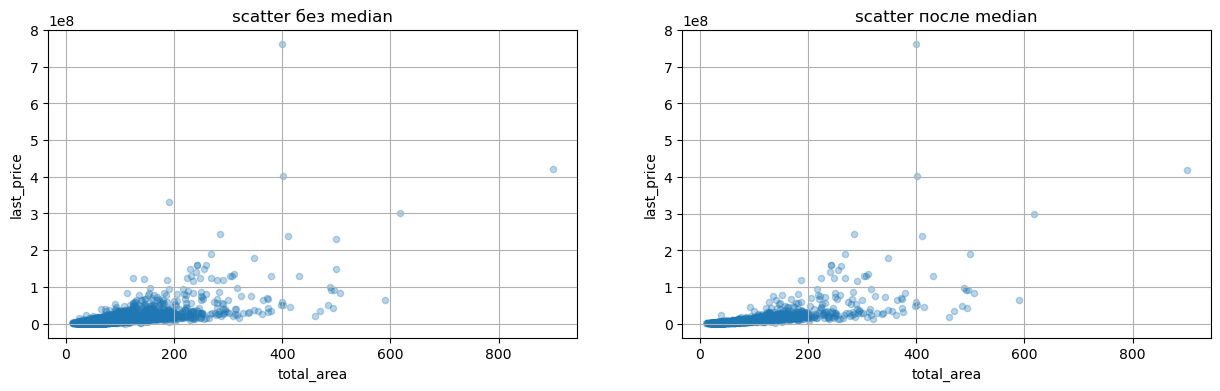

In [64]:
price_depend('total_area')

Ограничим область до 250 м^2, стоимость -- зо 30 млн рублей

            last_price  total_area
last_price    1.000000    0.786371
total_area    0.786371    1.000000


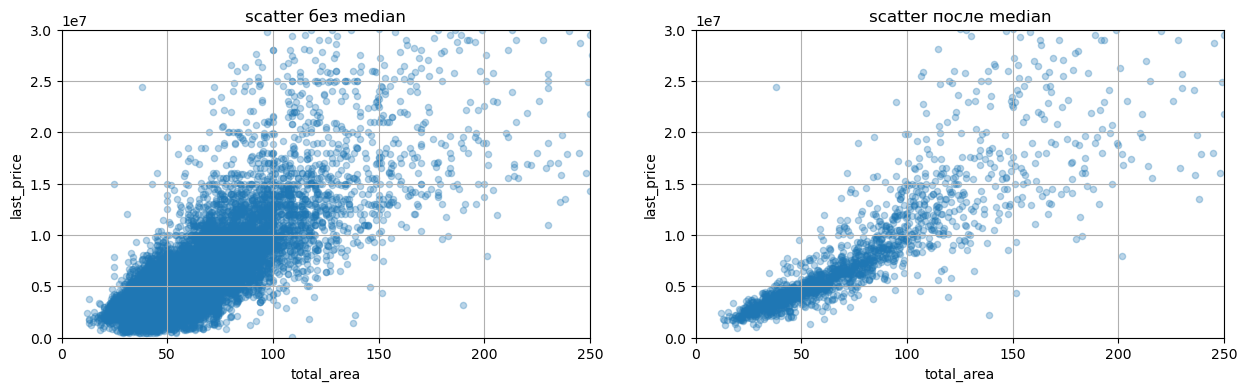

In [65]:
price_depend('total_area', x_start=0, x_end=250, y_start=0, y_end=30000000)

Чем квартира больше, тем она дороже. Причем, в области "upper middle class" корелляция становится сильнее - с 0.64 до 0.79.

#### 4.3.2 Влияние параметра "жилая площадь" на общую стоимость

             last_price  living_area
last_price     1.000000     0.557349
living_area    0.557349     1.000000


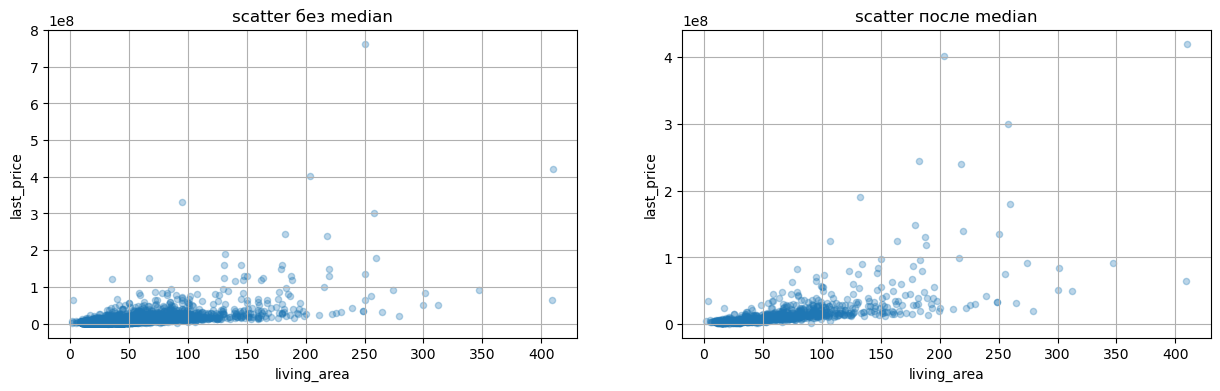

In [66]:
price_depend('living_area')

Ограничим область до 200 м^2, стоимость -- до 30 млн рублей

             last_price  living_area
last_price      1.00000      0.67995
living_area     0.67995      1.00000


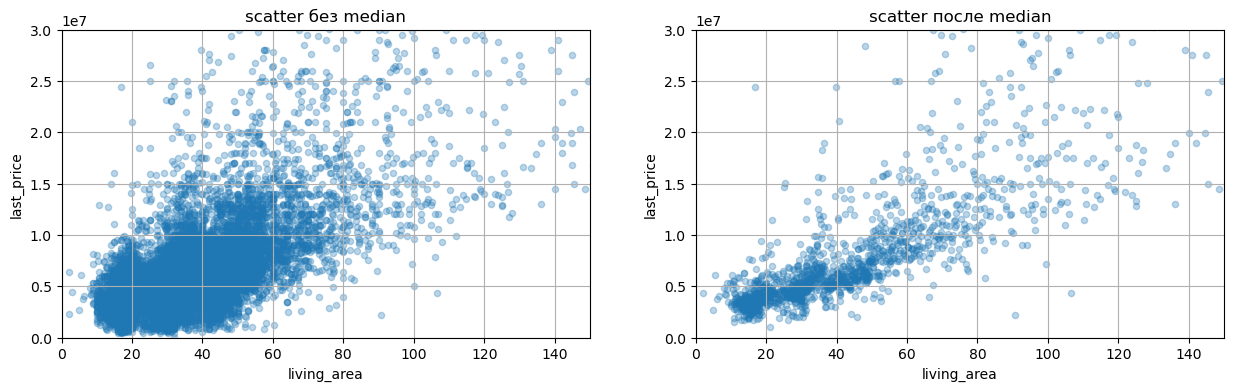

In [67]:
price_depend('living_area', x_start=0, x_end=150, y_start=0, y_end=30000000)

Чем жилая площадь больше, тем квартира дороже. Причем, в области "upper middle class" корелляция становится сильнее - с 0.55 до 0.68.

#### 4.3.3 Влияние параметра "площадь кухни" на общую стоимость

              last_price  kitchen_area
last_price      1.000000      0.510281
kitchen_area    0.510281      1.000000


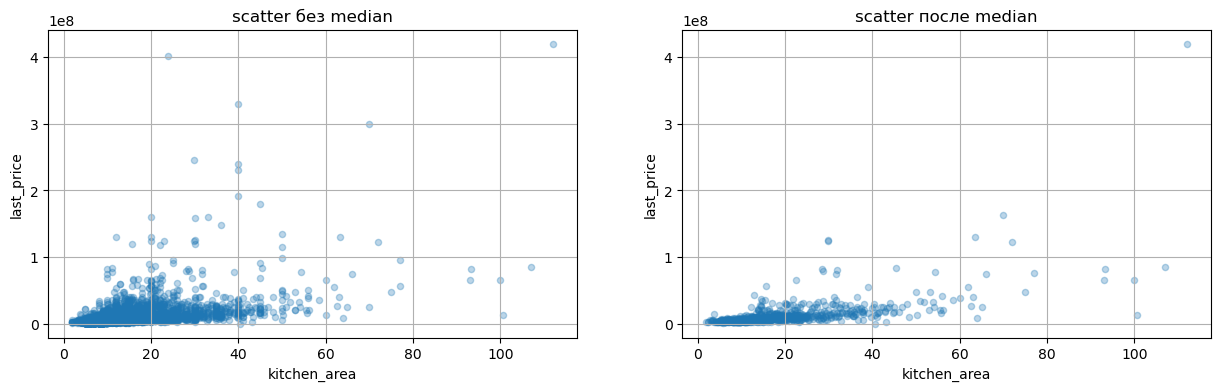

In [68]:
price_depend('kitchen_area')

Ограничим область до 200 м^2, стоимость -- до 30 млн рублей

              last_price  kitchen_area
last_price      1.000000      0.598125
kitchen_area    0.598125      1.000000


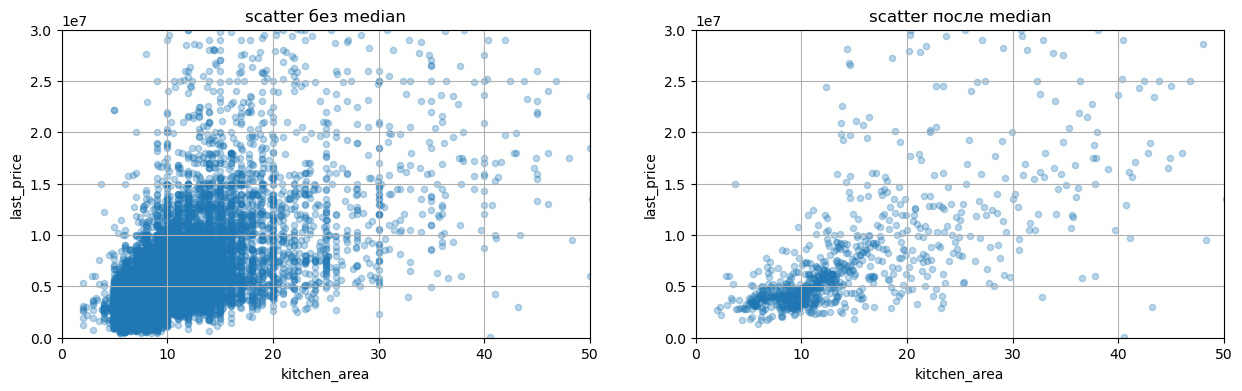

In [69]:
price_depend('kitchen_area', x_start=0, x_end=50, y_start=0, y_end=30000000)

Чем кухня больше, тем квартира дороже, но зависимость слабее, если сравнивать с общей или жилой площадью. Причем, в области "upper middle class" корелляция становится сильнее - с 0.52 до 0.60.

#### 4.3.4 Влияние параметра "количество комнат" на общую стоимость

            last_price     rooms
last_price    1.000000  0.353737
rooms         0.353737  1.000000


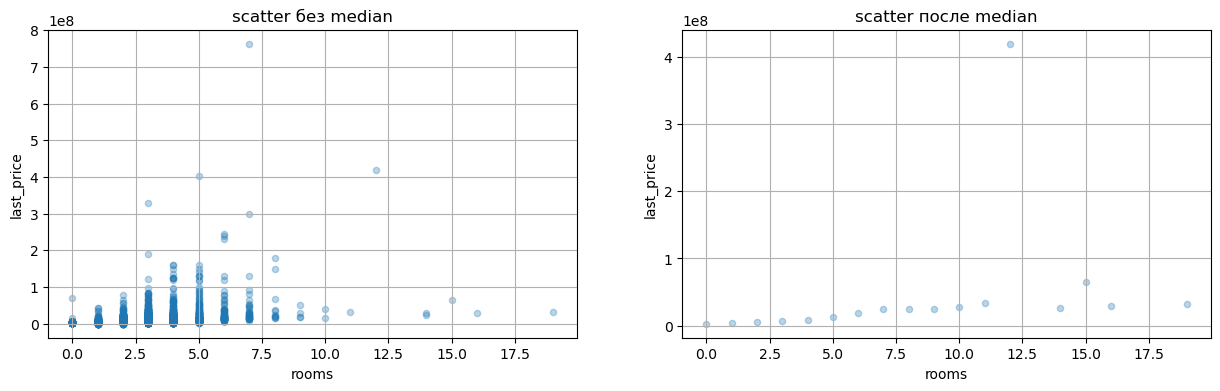

In [70]:
price_depend('rooms')

Ограничим область до восьми квартир, стоимость -- до 30 млн рублей

            last_price     rooms
last_price    1.000000  0.517804
rooms         0.517804  1.000000


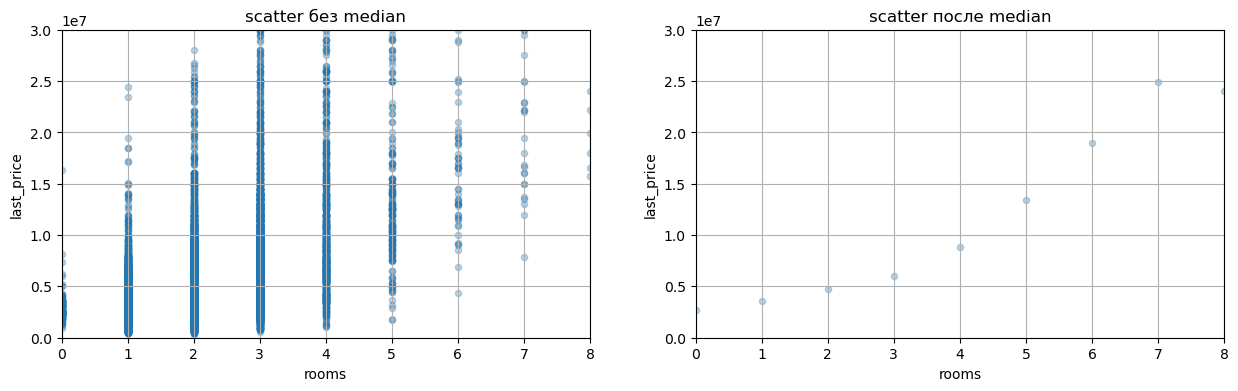

In [71]:
price_depend('rooms', x_start=0, x_end=8, y_start=0, y_end=30000000)

Тут уже интереснее.

Влияние количества комнат на стоимость квартиры есть, корелляция положительная, но
1. Она слабее по сравнению с площадью
2. Разброс стоимости внутри групп квартир с одинаковым количестовом комнат схож по группам от четырех до семи комнат

В области "upper middle class" корелляция становится сильнее - с 0.35 до 0.52, но все еще заметно слабее в сравнении с влиянием общей или жилой площади.

#### 4.3.5 Влияние параметра "этажа, на котором расположена квартира (первый, последний, другой)" на общую стоимость

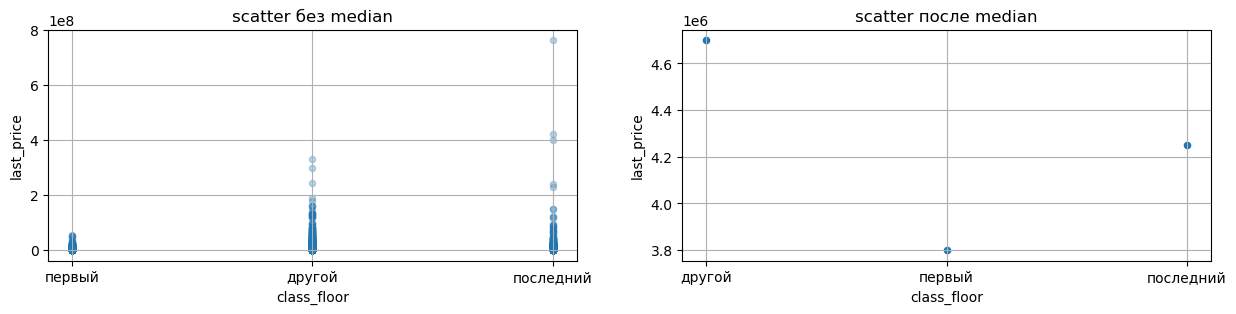

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

clean_data.plot(kind='scatter', x='class_floor', y='last_price', ax=axes[0], grid=True, alpha=0.3, title='scatter без median')

clean_data.pivot_table(index='class_floor', values='last_price', aggfunc='median').reset_index().\
plot(kind='scatter', x='class_floor', y='last_price', ax=axes[1], grid=True, title='scatter после median');

Тоже интересно.

Медианные значания ведут себя как и предполагалось -- квартиры на первом этаже самые дешевые, 3,9 млн рублей, далее идут квартиры на последнем этаже -- в среднем 4,3 млн рублей. Что доступнее, чем средняя квартира между ними, которая стоит 48,5 млн руб.

Но если посмотреть на выбросы, то мы увидим, что они драматтичнее всего в квартирах на последних этажах -- от 400 до 800 миллионов примерно. Судя по всему, в Санкт-Петербурге распространены жилые пентхаусы.

#### 4.3.6 Влияние параметра "день недели размещения" на общую стоимость

                         last_price  date_exposition_dow_num
last_price                 1.000000                 0.004369
date_exposition_dow_num    0.004369                 1.000000


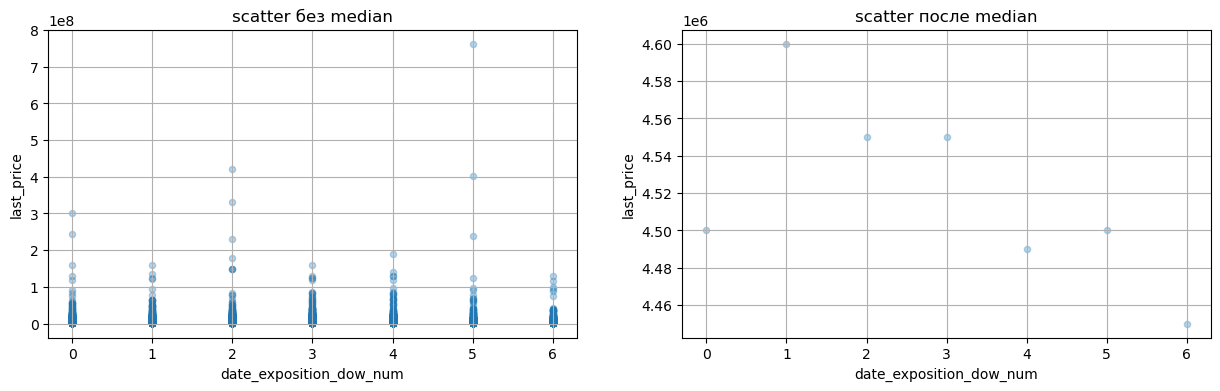

In [73]:
price_depend('date_exposition_dow_num')

Судя по всему, день недели размещения объявления не влияет на стоимость. коэффициент корреляции 0.004369, медианные значения в диапазоне двухсот тысяч.

#### 4.3.7 Влияние параметра "месяц размещения" на общую стоимость

                           last_price  date_exposition_month_num
last_price                   1.000000                   0.005596
date_exposition_month_num    0.005596                   1.000000


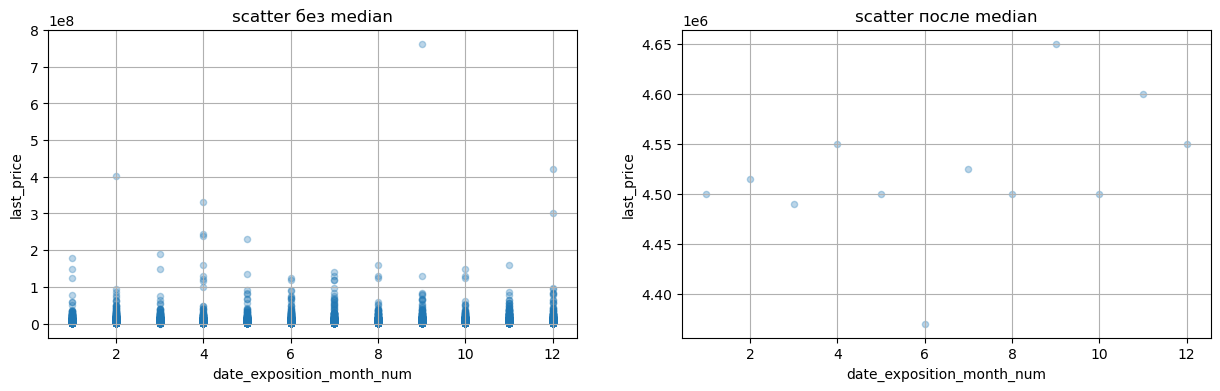

In [74]:
price_depend('date_exposition_month_num')

Уже лучше, но все равно рано говорить о влиянии. Коэффициент корелляции около нуля -- 0.005596, самое низкое значение (в июне) и самое высокое значение (в сентябре) по медиане отличаются на 400 тысяч рублей.

#### 4.3.8 Влияние параметра "год размещения" на общую стоимость

                      last_price  date_exposition_year
last_price              1.000000             -0.060903
date_exposition_year   -0.060903              1.000000


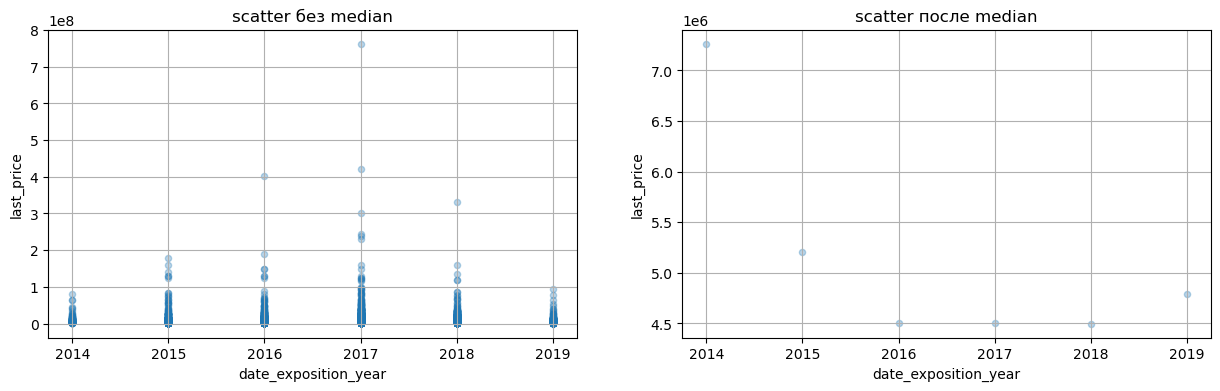

In [75]:
price_depend('date_exposition_year')

Видим спад стоимости с 2015-го года с последующим восстановительным ростом после 2019, медианные значения меняются в пределах одного миллиона.

Посмотрим, как изменялась по годам стоимость квадратного метра и общая площадь:

                        price_pro_square_meter  date_exposition_year
price_pro_square_meter                1.000000             -0.010483
date_exposition_year                 -0.010483              1.000000


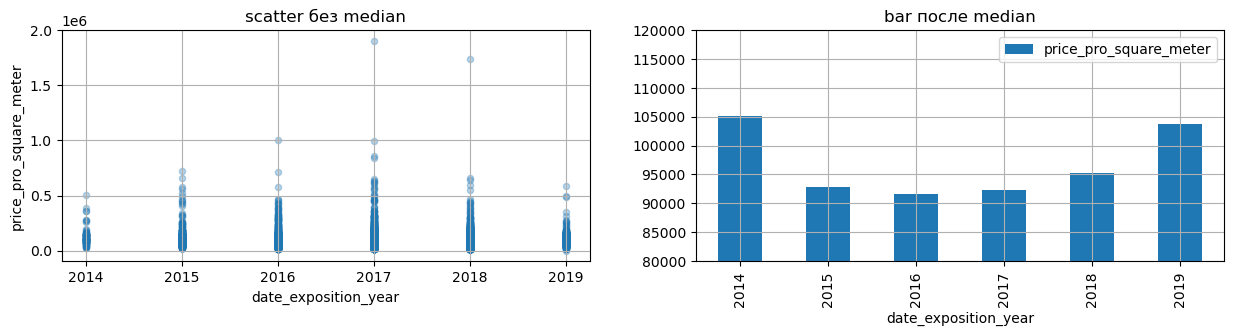

In [76]:
# Графики "стоимость за квадратный метр" - "год"

print(clean_data[['price_pro_square_meter', 'date_exposition_year']].corr())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

clean_data.plot(kind='scatter', x='date_exposition_year', y='price_pro_square_meter', ax=axes[0],\
                grid=True, alpha=0.3, title='scatter без median') 

clean_data.pivot_table(index='date_exposition_year', values='price_pro_square_meter', aggfunc='median').\
reset_index().plot(kind='bar', x='date_exposition_year', y='price_pro_square_meter', ax=axes[1],\
                   ylim=(80000, 120000), grid=True, title='bar после median');

                      total_area  date_exposition_year
total_area              1.000000             -0.112634
date_exposition_year   -0.112634              1.000000


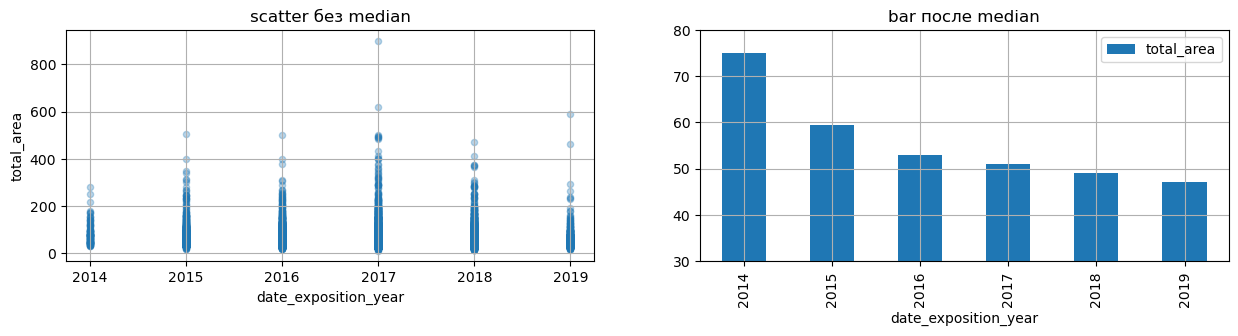

In [77]:
# Графики "площадь квартиры" - "год"

print(clean_data[['total_area', 'date_exposition_year']].corr())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

clean_data.plot(kind='scatter', x='date_exposition_year', y='total_area', ax=axes[0], \
                grid=True, alpha=0.3, title='scatter без median') 

clean_data.pivot_table(index='date_exposition_year', values='total_area', aggfunc='median').\
reset_index().plot(kind='bar', x='date_exposition_year', y='total_area', ax=axes[1], \
                   ylim=(30, 80), grid=True, title='bar после median');

Всё на всё влияет, посмотрим на матрицу корреляции и матрицу диаграмм рассеяния.

                        date_exposition_year  last_price  \
date_exposition_year                1.000000   -0.060903   
last_price                         -0.060903    1.000000   
price_pro_square_meter             -0.010483    0.736775   
total_area                         -0.112634    0.643075   

                        price_pro_square_meter  total_area  
date_exposition_year                 -0.010483   -0.112634  
last_price                            0.736775    0.643075  
price_pro_square_meter                1.000000    0.305110  
total_area                            0.305110    1.000000  


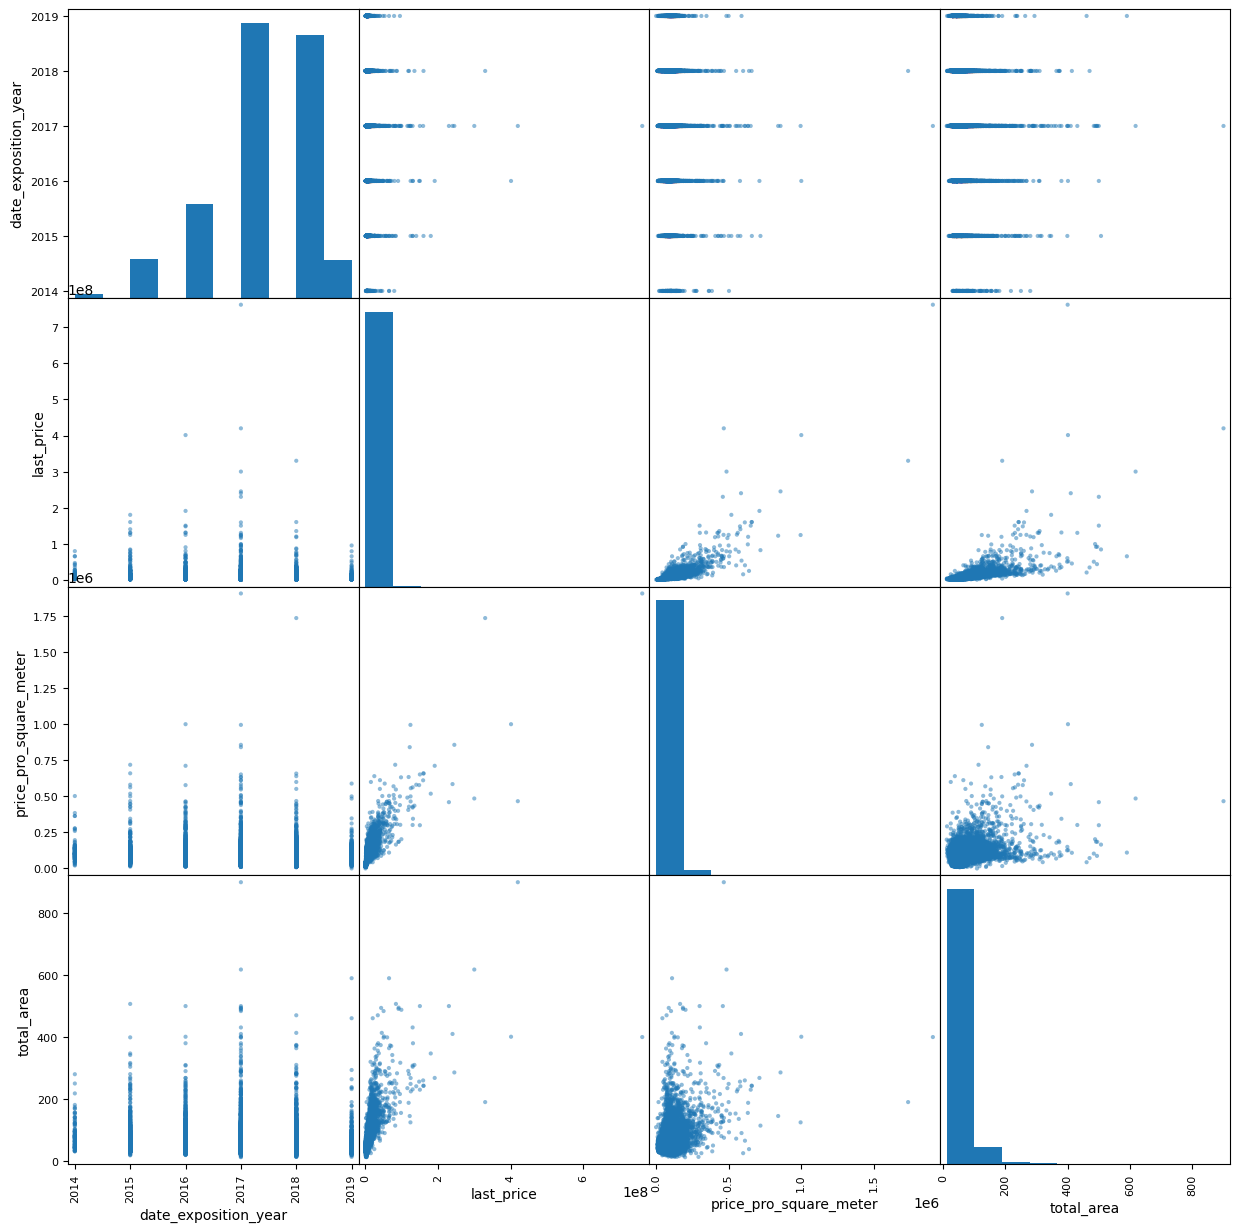

In [78]:
# матрица корреляции
print(clean_data[['date_exposition_year', 'last_price', 'price_pro_square_meter', 'total_area']].corr())

# матрица диаграмм рассеяния
pd.plotting.scatter_matrix(clean_data[['date_exposition_year', 'last_price', \
                                              'price_pro_square_meter', 'total_area']], figsize=(15, 15));

Более значительное влияние на стоимость оказала динамика стоимости квадратного метра, чем площадь объекта -- 0,74 против 0,64. 

На этом фоне выделяется 2014-й год. Посмотрим на него внимательнее:

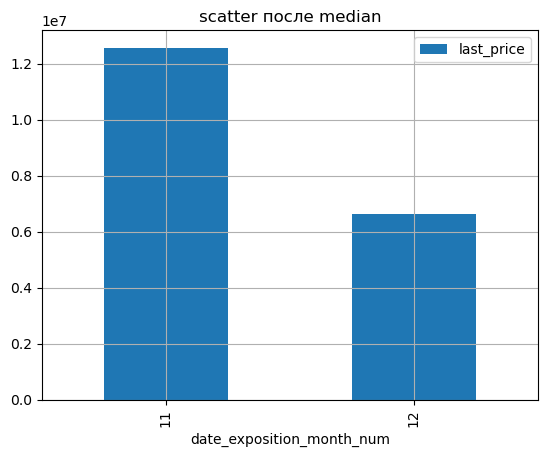

In [79]:
clean_data[clean_data['date_exposition_year'] == 2014].\
pivot_table(index='date_exposition_month_num', values='last_price', aggfunc='median').reset_index().\
plot(kind='bar', x='date_exposition_month_num', y='last_price', grid=True, title='scatter после median');

К сожалению, по 2014-му году данных немного -- ноябрь и декабрь, но, так или иначе, вспомним, что происходило в 2014-м году:
    
https://tass.ru/info/1889272, например.

С марта 2014 начался ощутимое падение курса рубля, все побежали выходить из него выходить, в том числе и покупать квартиры. Спрос подскочил, цены временно поднялись. К февралю 2015-го всё более-менее стабилизировалось.
Это мы на графиках и видим, по большому счету.

### 4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Мы выяснили в пункте 3.1.4, что города и поселки в категориях "район Санкт-Петербурга (город)" и "район Санкт-Петербурга (посёлок)" тоже являются частью Санкт-Петербурга. Поэтому для этой части исследования введем колоку с укрупненными значениями по населенным пунктам.

In [80]:
# Инициализация locality_name_gross
clean_data.loc[:,'locality_name_gross'] = clean_data.loc[:,'locality_name']

# Помещаем районы Санкт Петербурга в Санкт-Петербург
clean_data.loc[:,'locality_name_gross'] = \
clean_data.where((clean_data['class_loc'] != 'район Санкт-Петербурга (город)') & \
                 (clean_data['class_loc'] != 'район Санкт-Петербурга (посёлок)'), 'Санкт-Петербург')['locality_name_gross']

In [81]:
# Определяем TOP10 населенных пунктов по объявлениям
clean_data_head10 = clean_data.groupby('locality_name_gross')['locality_name_gross'].\
count().sort_values(ascending=False).head(10).index

# Строим сводную таблицу, сортируем по стоимости за квадрат (тут query() пригодился)
clean_data.query('locality_name_gross in @clean_data_head10')


Unnamed: 0  total_images  last_price  total_area first_day_exposition  \
0               1             7     3350000       40.40           2018-12-04   
1               2            10     5196000       56.00           2015-08-20   
2               3             0    64900000      159.00           2015-07-24   
3               4             2    10000000      100.00           2018-06-19   
5               6             6     3700000       37.30           2017-11-02   
...           ...           ...         ...         ...                  ...   
20434       23689            13     3550000       35.30           2018-02-28   
20435       23690             3     5500000       52.00           2018-07-19   
20436       23691            11     9470000       72.90           2016-10-13   
20438       23693             9     4600000       62.40           2016-08-05   
20440       23697            13    11475000       76.75           2017-03-28   

       rooms  ceiling_height  floors_total  living_area  floor  ...  \
0          1             2.6            11         18.6      1  ...   
1          2             2.6             5         34.3      4  ...   
2          3             3.0            14          NaN      9  ...   
3          2             3.0            14         32.0     13  ...   
5          1             2.6            26         10.6      6  ...   
...      ...             ...           ...          ...    ...  ...   
20434      1             2.9            15         16.3      4  ...   
20435      2             3.0             5         31.0      2  ...   
20436      2             2.8            25         40.3      7  ...   
20438      3             2.6             9         40.0      8  ...   
20440      2             3.0            17          NaN     12  ...   

       days_exposition                         class_loc  \
0                   81  район Санкт-Петербурга (посёлок)   
1                  558                             город   
2                  424                             город   
3                  121                             город   
5                  155  район Санкт-Петербурга (посёлок)   
...                ...                               ...   
20434               29                             город   
20435               15                             город   
20436              519                             город   
20438              239    район Санкт-Петербурга (город)   
20440              602                             город   

       quant_distance_center  price_pro_square_meter date_exposition_dow_num  \
0                        9.0                   82920                       1   
1                        6.0                   92785                       3   
2                        2.0                  408176                       4   
3                        3.0                  100000                       1   
5                        9.0                   99195                       3   
...                      ...                     ...                     ...   
20434                    8.0                  100566                       2   
20435                    2.0                  105769                       3   
20436                    1.0                  129903                       3   
20438                   10.0                   73717                       4   
20440                    3.0                  149511                       1   

       date_exposition_month_num  date_exposition_year  class_floor  \
0                             12                  2018       первый   
1                              8                  2015       другой   
2                              7                  2015       другой   
3                              6                  2018       другой   
5                             11                  2017       другой   
...                          ...                   ...          ...   
20434         

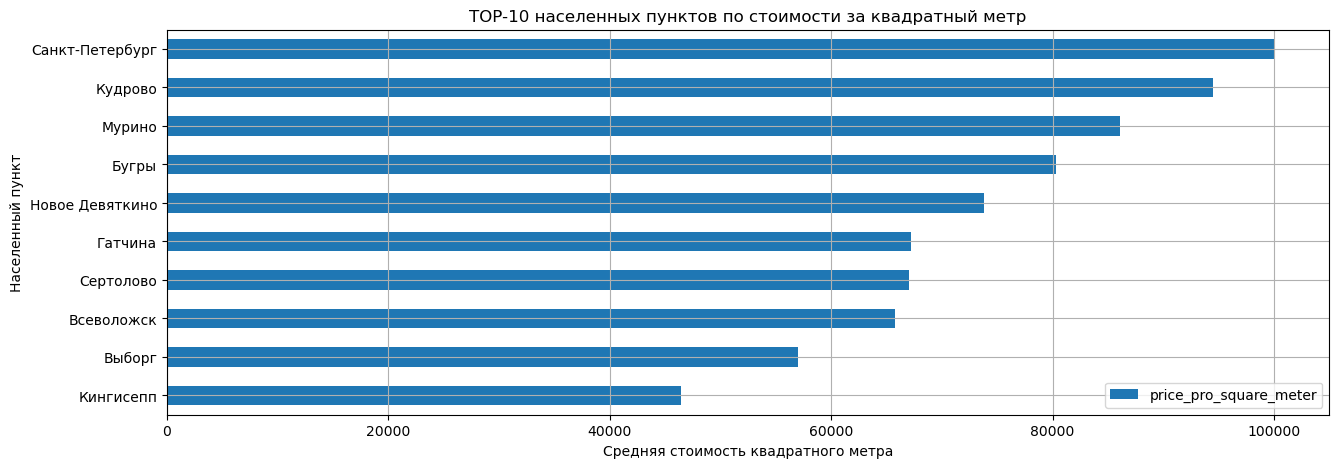

In [82]:
# И график для наглядности

clean_data.query('locality_name_gross in @clean_data_head10').\
pivot_table(index='locality_name_gross', values=['price_pro_square_meter'], aggfunc='median').\
sort_values('price_pro_square_meter').plot(kind='barh', grid=True, figsize=(15, 5), \
                                           xlabel='Средняя стоимость квадратного метра', \
                                           ylabel='Населенный пункт', \
                                           title = 'TOP-10 населенных пунктов по стоимости за квадратный метр');

- в выборку попали только три населенных пункта, которые не являются сателлитами Санкт-Петербурга:
    + Гатчина (шестое место, 67 180 рублей за м2)
    + Выборг (девятое место, 56 960 рублей за м2)
    + Кингисепп (десятое (последнее) место, 46 428 рублей за м2)
- top-3 по стоимости м2 -- Санкт Петербург и два соседних города:
    + Санкт-Петербург -- 100 000 рублей за м2
    + Кудрово -- 94 507 рублей за м2
    + Мурино -- 86 111 рублей за м2
- наблюдается общая закономерность -- чем дальше от Санкт-Петербурга, тем объявлений меньше, а стоимость квадратного метра дешевле.

### 4.5 Выделите квартиры в Санкт-Петербурге и вычислите их среднюю стоимость на разном удалении от центра

Что такое центр города?

Либо точка, либо район. Для текущего исследования измерим расстояние между Дворцовой площадью и Площадью Восстания, получим примерно три километра, назначим центром всё, что внутри окружности с трехкилометровым радиусом.
Обратим внимание, что нам оять пригодится колонка "locality_name_gross"
Построим таблицу:

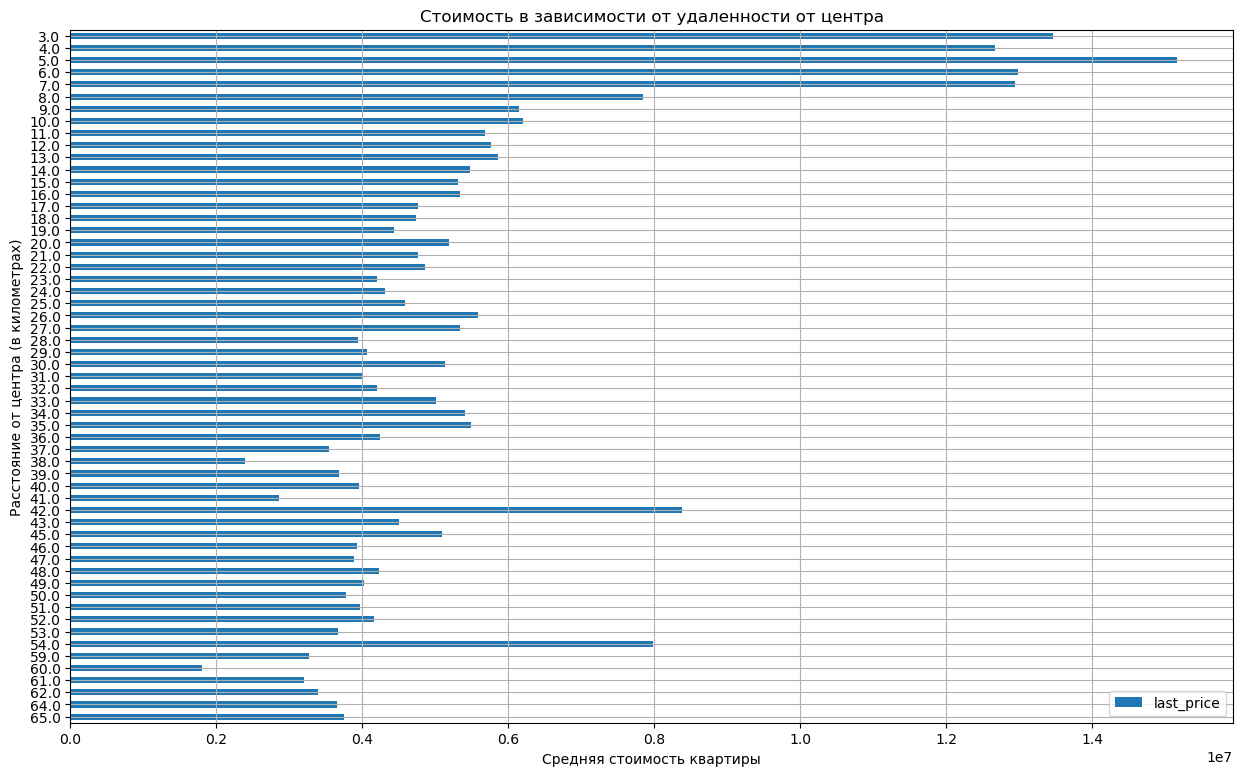

In [83]:
clean_data.loc[(clean_data['locality_name_gross'] == 'Санкт-Петербург') & (clean_data['cityCenters_nearest_km'] >= 3), :].\
pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').\
sort_values('cityCenters_nearest_km', ascending=False).plot(kind='barh', grid=True, figsize=(15, 9), \
                                                            xlabel='Средняя стоимость квартиры', \
                                                            ylabel='Расстояние от центра (в километрах)', \
                                                            title = 'Стоимость в зависимости от удаленности от центра');

Около центра (радиусы три и четыре) цена ниже, чем в радиусах пять и шесть.
Посмотрим, что внутри центра в сравнении с прилегающими территориями:

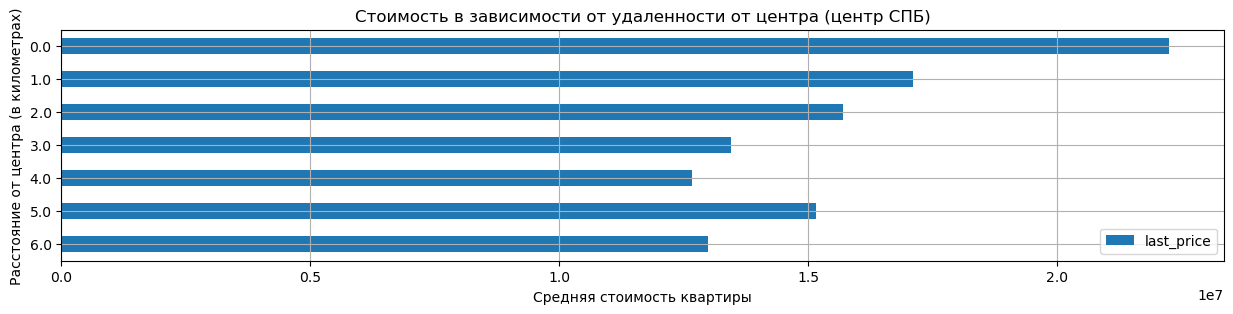

In [84]:
clean_data.loc[(clean_data['locality_name_gross'] == 'Санкт-Петербург') & (clean_data['cityCenters_nearest_km'] <= 6), :].\
pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').\
sort_values('cityCenters_nearest_km', ascending=False).\
plot(kind='barh', grid=True, figsize=(15, 3), \
     xlabel='Средняя стоимость квартиры', \
     ylabel='Расстояние от центра (в километрах)', \
     title = 'Стоимость в зависимости от удаленности от центра (центр СПБ)');

Более-менее ровно, но на пятом километре есть какие-то дорогие районы, их много, они отдельно не отмечены, поэтому больше мы без адресов ничего особо не вытащим.

Также видим два выбивающихся из тренда километра -- 42-й и 54-й.

Строим графики, чтоб посмотреть, какие районы на таком отдалении от центра.

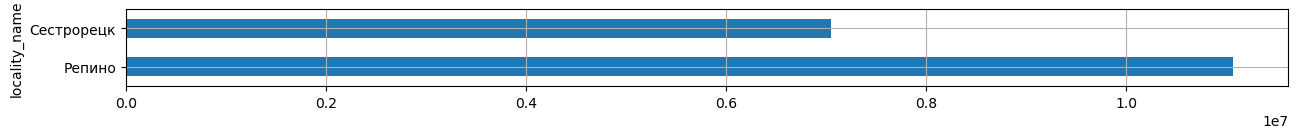

In [85]:
clean_data.loc[(clean_data['locality_name_gross'] == 'Санкт-Петербург') & (clean_data['cityCenters_nearest_km'] == 42), :]\
.groupby('locality_name')['last_price'].mean().plot(kind='barh', grid=True, figsize=(15, 1));

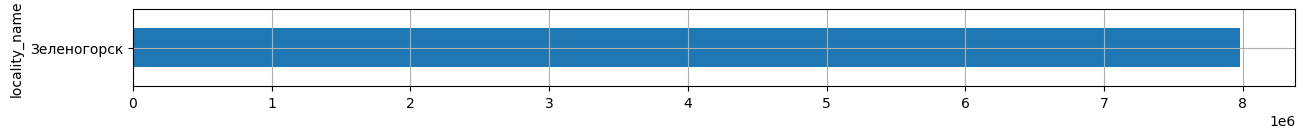

In [86]:
clean_data.loc[(clean_data['locality_name_gross'] == 'Санкт-Петербург') & (clean_data['cityCenters_nearest_km'] == 54), :]\
.groupby('locality_name')['last_price'].mean().plot(kind='barh', grid=True, figsize=(15, 1));

Нашли два экологичных района внутри Санкт-Петербурга с дорогой недвижимостью -- Репино и Зеленогорск, всплески объяснены.

## Шаг 5. Общий вывод

1. **Рекомендации в части данных**
* **balcony**
    - Следует выровнять подход к хранению данных с квартирами без балконов -- нули либо пустые значения
* **is_apartment, ceiling_height, living_area, kitchen_area**    
    Тут два варианта вижу:
    - Либо заполнять автоматически по адресу квартиры (если эти данные возможно получить)
    - Либо встраивать подсказки при заполнении на форме
* **days_exposition**
    - Если эта корректное поведение системы, то в описании выгрузки следует указать, что объявленя с пустым days_exposition являются активными
    - Иначе следует проверить механизмы эаполнения и передачи этого поля
    - В ходе анализа динамика продаж обнаружены три пика -- 45, 60 и 90(возможно) дней. Похоже на робота, которые работает по каким-то своим фильтрам. Следует выяснить у команды Развития или Сопровождения, что это за круглые даты такие.
* **locality_name**
    - В поле locality_name записаны как и название города "Санкт-Петербург", так и его внутригородские муниципальные образования. Предлагаю записывать из вотдельную колонку с районом Санкт-Петербурга, которую заполнять из адреса квартиры
2. **Результаты исследования**
* **2.1 Исследования параметров объектов:**
    - **Общая  площадь**
        + Большинство квартир на рынке от 30-и до 50-и квадратных метров
        + После 50-и квадратных метров количество квартир падает с ростом площади
     - **Жилая площадь**
         + Большинство квартир на рынке имеют жилую пложадб от 15 до 20-и квадратных метров и от 26-и до 40-и квадратных метров
         + После 45-и квадратных метров количество квартир падает с ростом жилой площади
     - **Площадь кухни**
         + Большинство квартир на рынке имеют кухню в пределах от шести до десяти квадратных метров
         + Особо часто встречаются кухни шести и десяти квадратных метров
         + После 10-и квадратных метров количество квартир падает с ростом площади кухни
     - **Цена объекта**
         + Большинство квартир на рынке недвижимсоти стоят от 3-х до 6-и миллионов рублей
         + После 4-х миллионов с ростом стоимости квартиры падает их количество
     - **Количество комнат**
         + Большинство квартир на рынке от одной до двух комнат, разница по количеству между ними незначительна
         + Трехкомнатных квартир на четверть меньше, допустим, однокомнатных, но уже в разы больше квартир с бОльшим количеством комнат
     - **Высота потолков**
         + Большинство квартир 2,6-2,7 метров в высоту, далее -- 2,5-2,6 метров, после этого наблюдаем снижение количества квартир до трех метров, после этого -- падение до незначительного количества
     - **Тип этажа квартиры**
         + 74% от всех квартир ни на первом, ни на последнем этаже, количество по первому и последнему этажу примерно равно -- в пять-шесть раз меньше, чем квартир между ними.
     - **Общее количество этажей в доме**
         + Сравнительно много объявлений по пяти- и девятиэтажкам -- 13 и 5 процентов соттветственно, также наболюдаются незначительные всплески для 12, 16 и 25 этажных домов
     - **Расстояние до центра города в метрах**
         + Основной массив квартир внутри трёх и четырнадцати километров от центра Санкт-Петербурга
         + Обнаружено несколько пиков:
            1. Два пика внутри Санкт-Петербурга -- с трёх до семи километров от центра и с восьми до семнадцати километров.
            2. Далее пики формируют добавленные города-поселки внутри Санкт-петербурга, а также города-сателлиты -- Парголово, Шушары, например. Особый всплеск на 21-м километре нам обеспечивает Мурино, далее уже более плавно до 37-го килоетра.
            3. Последний всплеск - три города: Ломоносов, Кронштадт и Зеленогорск соответсвенно. С 48-го до 63-й километр.
     - **Расстояние до ближайшего парка**
         + Если парк есть в радиусе трёх километров, то большинство парков всё же на расстоянии от ста до семьсот пятидесяти метров от квартиры
         
         
* **2.2 Динамика продажи квартир:**
    - Большинство квартир продаются за первые сто дней
    - Для тех квартир, что не продались за первые сто дней, падение количества нелинейно с течением времени
    - В ходе исследования стоимости было обнаружено постоянное снижение средней площади продаваемых объектов от года к году -- от 75.03м2 в 2014 до 47.20м2 в 2019-м 

* **2.3 Влияние факторов на общую стоимость**
    - **Высокое влияние**
        + общая площадь (0.64 на полном объеме, 0.78 для квартир дешевле 30 млн рублей)
        + жилая площадь (0.55 на полном объеме, 0.67 для квартир дешевле 30 млн рублей)
    - **Незначительное влияние**
        + день недели и месяц размещения объявления дают незначительные колебания, коэффициенты около нуля -- 0.004369 и 0.005596 соотвтественно
        + Год размещения влияет на стоимость квартир следующим образом: 
            1. 7,3 миллиона за квартиру в среднем в 2014 году
            2. Спад до 5,2 миллионов за квартиру в среднем в 2015 году
            3. Продолжение снижения до 4,5 миллионов за квартиру в среднем в 2015, это значение сохраняется до 2018
            4. В 2019 незначительный рост средней стоимости до 4,8 млн рублей в среднем
            
* **2.4 Средняя цена за квадратный метр в top-10 населенных пунктов по количству объявлений**
    - чем дальше от Санкт-Петербурга, тем объявлений меньше, а стоимость квадратного метра дешевле
    - в выборку попали только три населенных пункта, которые не являются сателлитами Санкт-Петербурга:
        + Гатчина (шестое место, 67 180 рублей за м2)
        + Выборг (девятое место, 56 960 рублей за м2)
        + Кингисепп (десятое (последнее) место, 46 428 рублей за м2)
    - top-3 по стоимости м2 -- Санкт Петербург и два соседних города:
        + Санкт-Петербург -- 100 000 рублей за м2
        + Кудрово -- 94 507 рублей за м2
        + Мурино -- 86 111 рублей за м2

* **2.5 Средняя стоимость квартир Санкт-Петербурга на разном удалении от центра**
    - Самая дорогая недвижимость до седьмого километра -- 12-13 миллионов рублей в среднем за квартииру
    - Далее стоимостьь падает с удалением от центра
    - Выделяются 42-й и 54-й километры:
        + на 42-м километре продаются квартиры в Репино за 11 миллионов рублей в среднем
        + на 54-м километре продаются квартиры в Зеленогорске за 8 миллионов рублей в среднем